<center><h1>US House Pricing Prediction</h1></center>

<h3>Introduction</h3>


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

<h3>Business Problem</h3>

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

<br>

**The company wants to know:**

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 <br>

**Business Goal**


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


<h2>Data Definition</h2>

<ul><ol>MSSubClass: Identifies the type of dwelling involved in the sale.	</ol>
<ol>MSZoning: Identifies the general zoning classification of the sale.</ol>
<ol>LotFrontage: Linear feet of street connected to property</ol>
<ol>LotArea: Lot size in square feet</ol>
<ol>Street: Type of road access to property</ol>
<ol>Alley: Type of alley access to property</ol>
<ol>LotShape: General shape of property</ol>
<ol>LandContour: Flatness of the property</ol>
<ol>Utilities: Type of utilities available</ol>
<ol>LotConfig: Lot configuration</ol>
<ol>LandSlope: Slope of property</ol>
<ol>Neighborhood: Physical locations within Ames city limits</ol>
<ol>Condition1: Proximity to various conditions</ol>
<ol>Condition2: Proximity to various conditions (if more than one is present)</ol>
<ol>BldgType: Type of dwelling</ol>
<ol>HouseStyle: Style of dwelling</ol>
<ol>OverallQual: Rates the overall material and finish of the house</ol>
<ol>OverallCond: Rates the overall condition of the house</ol>
<ol>YearBuilt: Original construction date</ol>
<ol>YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)</ol>
<ol>RoofStyle: Type of roof</ol>
<ol>RoofMatl: Roof material</ol>
<ol>Exterior1st: Exterior covering on house</ol>
<ol>Exterior2nd: Exterior covering on house (if more than one material)</ol>
<ol>MasVnrType: Masonry veneer type</ol>
<ol>MasVnrArea: Masonry veneer area in square feet</ol>
<ol>ExterQual: Evaluates the quality of the material on the exterior </ol>
<ol>ExterCond: Evaluates the present condition of the material on the exterior</ol>
<ol>Foundation: Type of foundation</ol>
<ol>BsmtQual: Evaluates the height of the basement</ol>
<ol>BsmtCond: Evaluates the general condition of the basement</ol>
<ol>BsmtExposure: Refers to walkout or garden level walls</ol>
<ol>BsmtFinType1: Rating of basement finished area</ol>
<ol>BsmtFinSF1: Type 1 finished square feet</ol>
<ol>BsmtFinType2: Rating of basement finished area (if multiple types)</ol>
<ol>BsmtFinSF2: Type 2 finished square feet</ol>
<ol>BsmtUnfSF: Unfinished square feet of basement area</ol>
<ol>TotalBsmtSF: Total square feet of basement area</ol>
<ol>Heating: Type of heating</ol>
<ol>HeatingQC: Heating quality and condition</ol>
<ol>CentralAir: Central air conditioning</ol>
<ol>Electrical: Electrical system</ol>
<ol>1stFlrSF: First Floor square feet</ol>
<ol>2ndFlrSF: Second floor square feet</ol>
<ol>LowQualFinSF: Low quality finished square feet (all floors)</ol>
<ol>GrLivArea: Above grade (ground) living area square feet</ol>
<ol>BsmtFullBath: Basement full bathrooms</ol>
<ol>BsmtHalfBath: Basement half bathrooms</ol>
<ol>FullBath: Full bathrooms above grade</ol>
<ol>HalfBath: Half baths above grade</ol>
<ol>Bedroom: Bedrooms above grade (does NOT include basement bedrooms)</ol>
<ol>Kitchen: Kitchens above grade</ol>
<ol>KitchenQual: Kitchen quality</ol>
<ol>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</ol>
<ol>Functional: Home functionality (Assume typical unless deductions are warranted)</ol>
<ol>Fireplaces: Number of fireplaces</ol>
<ol>FireplaceQu: Fireplace quality</ol>
<ol>GarageType: Garage location</ol>
<ol>GarageYrBlt: Year garage was built</ol>
<ol>GarageFinish: Interior finish of the garage</ol>
<ol>GarageCars: Size of garage in car capacity</ol>
<ol>GarageArea: Size of garage in square feet</ol>
<ol>GarageQual: Garage quality</ol>
<ol>GarageCond: Garage condition</ol>
<ol>PavedDrive: Paved driveway</ol>
<ol>WoodDeckSF: Wood deck area in square feet</ol>
<ol>OpenPorchSF: Open porch area in square feet</ol>
<ol>EnclosedPorch: Enclosed porch area in square feet</ol>
<ol>3SsnPorch: Three season porch area in square feet</ol>
<ol>ScreenPorch: Screen porch area in square feet</ol>
<ol>PoolArea: Pool area in square feet</ol>
<ol>PoolQC: Pool quality</ol>
<ol>Fence: Fence quality</ol>
<ol>MiscFeature: Miscellaneous feature not covered in other categories</ol>
<ol>MiscVal: $Value of miscellaneous feature</ol>
<ol>MoSold: Month Sold (MM)</ol>
<ol>YrSold: Year Sold (YYYY)</ol>
<ol>SaleType: Type of sale</ol>
<ol>SaleCondition: Condition of sale</ol></ul>

In [6]:
#Import Required Packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math
import datetime

from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set default plot style
sns.set_style('darkgrid')

In [7]:
# import warnings module and set ignore to hide the warning messages
import warnings
warnings.filterwarnings('ignore')

In [8]:
# read the csv dataset
df = pd.read_csv('train.csv')

In [9]:
# Preview the data
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
# check the shape of the dataset
df.shape

(1460, 81)

In [11]:
# view the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset contains 81 features and 1460 records.

<h1> Data Cleaning<h1>

Lets starts datacleaning by droping the ID column first as it has no value to our model

In [12]:
# dropping column Id from dataframe
df.drop('Id',axis=1,inplace=True)

In [13]:
# defind a method to check null percentage of the features
def check_null_percentage(df):
    missing_info = pd.DataFrame(np.array(df.isnull().sum().sort_values(ascending=False).reset_index())\
                                ,columns=['Columns','Missing_Percentage']).query("Missing_Percentage > 0").set_index('Columns')
    return 100*missing_info/df.shape[0]

In [14]:
# view the null percentage of each feature
check_null_percentage(df)

Missing_Percentage
Columns                        
PoolQC                99.520548
MiscFeature            96.30137
Alley                 93.767123
Fence                 80.753425
FireplaceQu           47.260274
LotFrontage           17.739726
GarageYrBlt            5.547945
GarageCond             5.547945
GarageType             5.547945
GarageFinish           5.547945
GarageQual             5.547945
BsmtExposure            2.60274
BsmtFinType2            2.60274
BsmtCond               2.534247
BsmtQual               2.534247
BsmtFinType1           2.534247
MasVnrArea             0.547945
MasVnrType             0.547945
Electrical             0.068493

The missing Percentage here means that the house doesn't have that specific feature like Gargae has 5% of all its features missing then it means that house doesn't have garage and hence 'GarageType','GarageFinish','GarageQual','GarageCond' are all have same percenntage of misiing value. These can hence be filled with "NA" because using mode will give a different meaning and won't be the right approch to fix this. SO lets proceed by will these kind of missingvalues with NA 

In [15]:
# list all the null columns
NA_columns = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',\
          'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# fill the null values with NA
df[NA_columns] = df[NA_columns].fillna('NA')

In [16]:
# check in any rows had more than 5 na if it has more tha 5 na features willcan consider to drop them
df[df.isnull().sum(axis=1) > 5]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [17]:
# check if there are duplicated rows so if there are any we can drop them
df.duplicated(keep=False).sum()

0

There are no duplicated rows in the given data. Lets proceed with some further analyasis

To make a good prediction we need the categrical features to have a balanced or a fair ratio of labels. If a same value applies for 90% of the data set then that feature can't explain the target variable much and would product incorrect results when used in our model. So lets find the featurs which has most repetitive value.

In [18]:
# Create a method that returns a tuple that give information on the top most common value,
# its percentage and count for each feature
def top_unique_count(x):
    unq_cnt = ( x.value_counts(ascending=False,dropna=False).head(1).index.values[0],
               100 * x.value_counts(ascending=False,dropna=False).head(1).values[0]/df.shape[0],
               x.value_counts(ascending=False,dropna=False).head(1).values[0])
    return unq_cnt

In [19]:
#Assign it to a variable and provide column name once the tuble get converted to actual dataframe columns
unique_df = df.apply(lambda x: top_unique_count(x)).rename(index={0:"Value",1:'Percentage',2:'Count'})
unique_df.head(25)

MSSubClass   MSZoning  LotFrontage      LotArea     Street  \
Value        20.000000         RL          NaN  7200.000000       Pave   
Percentage   36.712329  78.835616    17.739726     1.712329  99.589041   
Count       536.000000       1151   259.000000    25.000000       1454   

                Alley   LotShape LandContour  Utilities  LotConfig  ...  \
Value              NA        Reg         Lvl     AllPub     Inside  ...   
Percentage  93.767123  63.356164   89.794521  99.931507  72.054795  ...   
Count            1369        925        1311       1459       1052  ...   

               PoolArea     PoolQC      Fence MiscFeature      MiscVal  \
Value          0.000000         NA         NA          NA     0.000000   
Percentage    99.520548  99.520548  80.753425    96.30137    96.438356   
Count       1453.000000       1453       1179        1406  1408.000000   

                MoSold       YrSold   SaleType  SaleCondition      SalePrice  
Value         6.000000  2009.000000         WD         Normal  140000.000000  
Percentage   17.328767    23.150685  86.780822      82.054795       1.369863  
Count       253.000000   338.000000       1267           1198      20.000000  

[3 rows x 80 columns]

We can see that many fetatures are filled with same values in 90% of its data

In [20]:
# view the null percentage of each feature
check_null_percentage(df)

Missing_Percentage
Columns                       
LotFrontage          17.739726
GarageYrBlt           5.547945
MasVnrArea            0.547945
MasVnrType            0.547945
Electrical            0.068493

LotFrontage has some null values which should be handled. As from my analysis we can groupby neighbourhod and LotCOnfig and view the median value of the them grouped together as Lotfrontage on each neighbourhood and LotFrontage for LotConfig are similar.

In [21]:
df['LotFrontage'] = df.groupby(['Neighborhood','LotConfig'])['LotFrontage'].\
                        apply(lambda x: np.Nan if x.median() == np.NaN else x.fillna(x.median()))
df['LotFrontage'].isnull().sum()

5

There are still some null values in LotFrontage. Okay now lets take just LotConfig and group it up and fill in the na with  median of LotFrontage as LotConfig is more relevant to LotFrontage.

In [22]:
df['LotFrontage'] = df.groupby(['LotConfig'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

Lets Analyse Garage features to determine how GarageYrBlt can be filled

In [23]:
df.loc[df.GarageYrBlt.isnull(),['GarageType','GarageCars','GarageArea','GarageFinish','GarageYrBlt','GarageQual','GarageCond']]

GarageType  GarageCars  GarageArea GarageFinish  GarageYrBlt GarageQual  \
39           NA           0           0           NA          NaN         NA   
48           NA           0           0           NA          NaN         NA   
78           NA           0           0           NA          NaN         NA   
88           NA           0           0           NA          NaN         NA   
89           NA           0           0           NA          NaN         NA   
...         ...         ...         ...          ...          ...        ...   
1349         NA           0           0           NA          NaN         NA   
1407         NA           0           0           NA          NaN         NA   
1449         NA           0           0           NA          NaN         NA   
1450         NA           0           0           NA          NaN         NA   
1453         NA           0           0           NA          NaN         NA   

     GarageCond  
39           NA  
48           NA  
78           NA  
88           NA  
89           NA  
...         ...  
1349         NA  
1407         NA  
1449         NA  
1450         NA  
1453         NA  

[81 rows x 7 columns]

From inspecting the Garage data there are few homes that doesn't have agarage and hence the data are null, for categorical variables we can fill it with NA and for numerical variables if the data is based on count/measurement we can fill it with 0. For Garage Year we can't fill it with 0 but we can check if the house build year and replace it with the same. This is just my assumption as it will have some significatent corr between the columns but less on target column compartively.

Lets check the Year build column before we proceed as nul values in Yearbuild will have no effect on our approach

In [24]:
df.YearBuilt.isnull().sum()

0

In [25]:
# replacing null values of GarageYrBlt with YearBuilt
df.loc[df.GarageYrBlt.isnull(),'GarageYrBlt'] = df.loc[df.GarageYrBlt.isnull(),'YearBuilt']

Lets fill Masonry veneer Area with 0 for all the Na values and Masonry veneer Type with Not Present 

In [26]:
# fill 0 and Not Present for numerical and categorical feature's null values
df.MasVnrArea.fillna(0,inplace=True)
df.MasVnrType.fillna('Not present',inplace=True)

<h2>Creating Derived Features</h2>

In [27]:
# Adding square feet of first floor and second floor
df['TotalFlrSFAbvGrd'] = df[['1stFlrSF','2ndFlrSF']].sum(axis=1)
# Adding all the bathrooms
df['TotalBath'] = df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].sum(axis=1)
# Adding square feet of all Porcch
df['TotalPorchSF'] = df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF']].sum(axis=1)

In [28]:
check_null_percentage(df)

Missing_Percentage
Columns                      
Electrical           0.068493

In [29]:
# create a list of numerical features
numerical_features = list(df.select_dtypes(include=[np.number]).columns.values)

# create a list of features that or categorical
categorical_features = list(df.select_dtypes(include=[np.object]).columns.values)

# Creata feature list for time sereis data
timeseries_features = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt']

In [30]:
# removing times series features from numerice to avoid repetition
for col in timeseries_features:
    numerical_features.remove(col) 

In [31]:
# adding numerical features to categrical if the unique value count in a feature is less tha are equal to 10
cat_feature = pd.Series(df[numerical_features].nunique().sort_values(),name='Count').to_frame().query('Count <= 10').index.values
categorical_features.extend(cat_feature)

In [32]:
# removing the numerical features tht belong to time series
for col in cat_feature:
    numerical_features.remove(col)

From the data we can observe that we have TotalBsmtSF and TotRmsAbvGrd which sums up the subs categories or values of the related data. Similarly we can get calculate a TotalSF for the floors and PorchSF And also calculate total number of Bathrooms

<br>
<h2>Analysing Numerical Variables</h2>

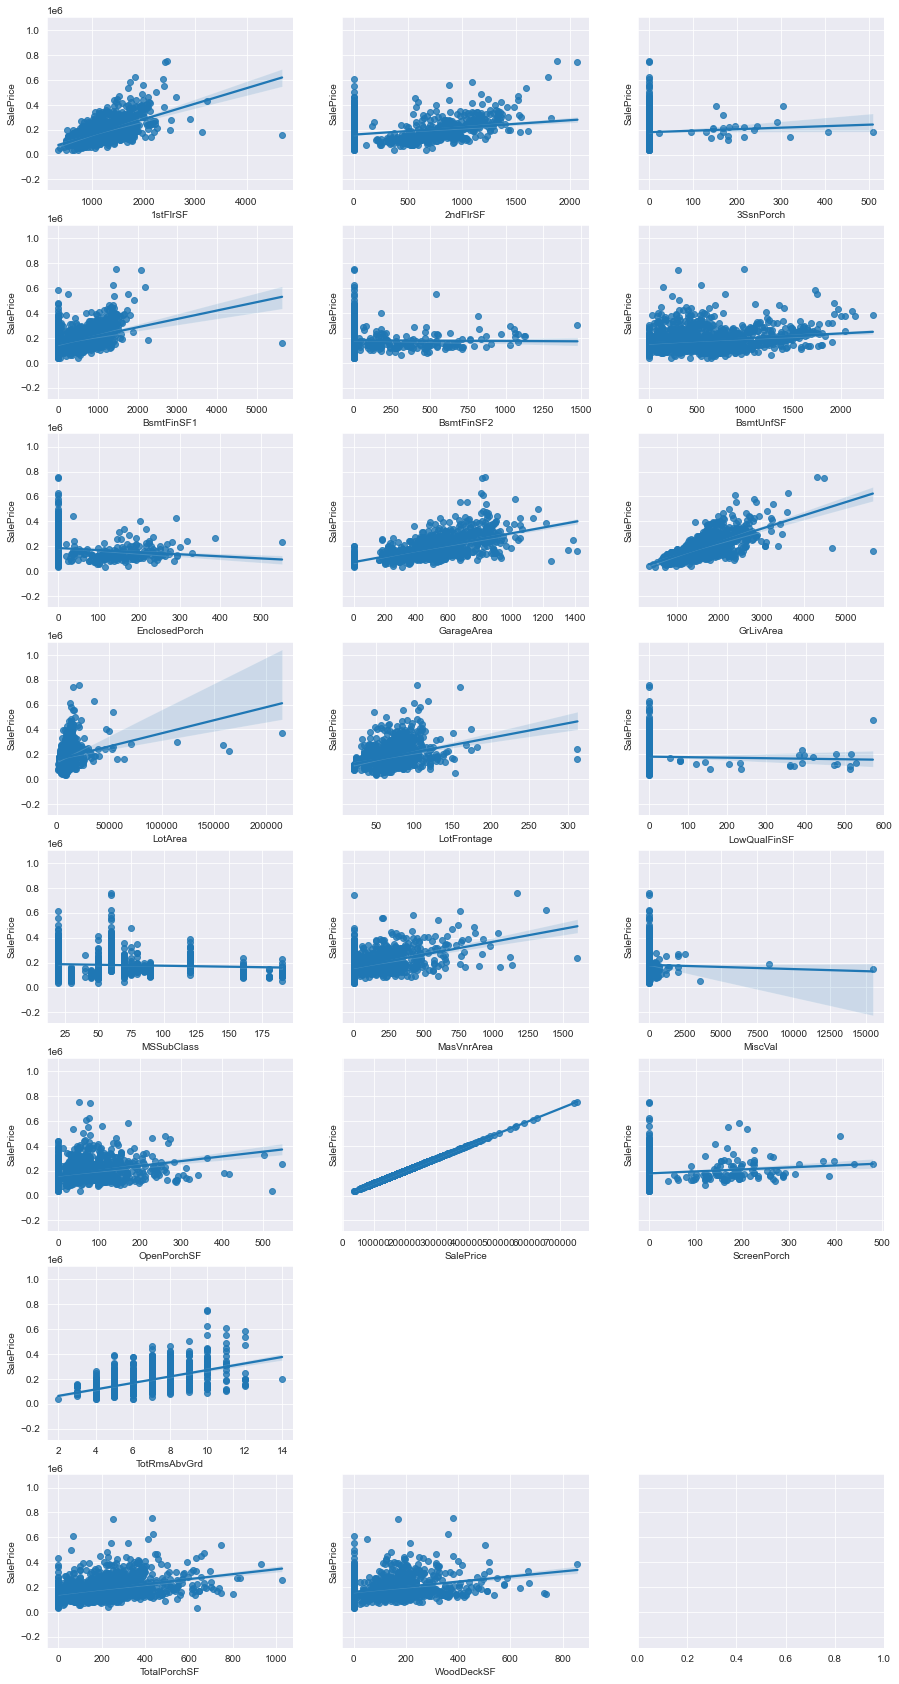

In [33]:
# define subplot columns and rows and the figure size
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(15,30),sharey=True)

# initialize the row and column variable

i ,j = 0, 0
for col in sorted(numerical_features):

    # Plot a regression plot for the numerical feature and SalePrice
    sns.regplot(col,'SalePrice',data=df,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
        
# hide last two grids as it doesn't have any plots to show
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

<h2>Observation</h2>

Outlier and Correlation:

    1stFlrSF : It has an outlier with sqft greater than 4000 at lower price whihc is not possible to sell
    
    2ndFlrSF : is not well correlated with salePrice
    
    BsmtFinSF1 : The Sqft is greater than 5000 with lower price which is not possible
    
    BsmtFinSF2 : A outlier with sqft almost 1500 is rated at lower price which doesn't look right and is not correlated with salePrice
    
    BsmtUnfSF : The feature doesn't influence the Saleprice much
    
    EnclosedPorch : AN outlier with sqft above 500 is rated at lower price.
    
    GarageArea : There are few outliers above 1200 sqft in realtion to price
    
    GrLivArea : There are few outliers at lower price and extreme sqft
    
    LotArea : Few outliers are present above 100000 sqft
    
    LotFrontage : Two outliers are at the exterme of above 300 linear feet
    
    MasVnrArea : There is one outlier above 1500 sqft
    
    MSSubClass : This feature doesn't provide any information about salePrice
    
    OpenPorchSF : Few outliers are present above 400 sqft
    
    TotalBsmtSF : An outlier is present with sqft of about 6000


In [34]:
# define the number of outliers to be handled for each feature
feature_outlier_count = {'1stFlrSF':1,
                'BsmtFinSF1':1,
                'BsmtFinSF2':1,
                'EnclosedPorch':2,
                'GarageArea':4,
                'GrLivArea':4,
                'LotArea':4,
                'LotFrontage':2,
                'MasVnrArea':1,
                'OpenPorchSF':3,
                'TotalBsmtSF':4,
                'TotRmsAbvGrd':1,
                'TotalFlrSFAbvGrd':2,
                'TotalPorchSF':1,
                'WoodDeckSF':3}

In [35]:
# define a method to print the outlier to have a visual representation of the data with saleprice
def print_outliers(feature_list):
    for k,v in feature_list.items():
        if v:
            display(df.loc[df[k].isin(sorted(df[k])[-v:]),[k,'SalePrice']])

# returns the outlier highest value or the value specific to index when specified 
def get_outliers(feature,index=-1):
    return df.loc[df[feature] == sorted(df[feature])[index],[feature,'SalePrice']].sort_values(by=feature,ascending=False)

In [36]:
# prints the outlier for each feature
print_outliers(feature_outlier_count)

1stFlrSF  SalePrice
1298      4692     160000

BsmtFinSF1  SalePrice
1298        5644     160000

BsmtFinSF2  SalePrice
322        1474     301000

EnclosedPorch  SalePrice
197            552     235000
747            386     265979

GarageArea  SalePrice
581         1390     253293
1061        1248      81000
1190        1356     168000
1298        1418     160000

GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000
1298       5642     160000

LotArea  SalePrice
249   159000     277000
313   215245     375000
335   164660     228950
706   115149     302000

LotFrontage  SalePrice
934         313.0     242000
1298        313.0     160000

MasVnrArea  SalePrice
297      1600.0     239000

OpenPorchSF  SalePrice
495           523      34900
583           502     325000
1328          547     256000

TotalBsmtSF  SalePrice
332          3206     284000
496          3200     430000
523          3138     184750
1298         6110     160000

TotRmsAbvGrd  SalePrice
635            14     200000

TotalFlrSFAbvGrd  SalePrice
523               4676     184750
1298              5642     160000

TotalPorchSF  SalePrice
1328          1027     256000

WoodDeckSF  SalePrice
53           857     385000
1068         728     151400
1459         736     147500

Lets drop the data in index 1298, this data doesn't seem to be wrong as this could be an exceptional record in our dataset but it lies far greater than other features and is being an outlier for the existing data so hence we need to handle it.

**This index has a huge impact on all the features deleting this record will be the best option, cause its affecting our good correlated features**

In [37]:
# Get teh index of the outlier in Feature 1stFlrSF
outlier_index = get_outliers('1stFlrSF').index.values[0]
outlier_index

1298

In [38]:
df.iloc[1298]

MSSubClass               60
MSZoning                 RL
LotFrontage           313.0
LotArea               63887
Street                 Pave
                     ...   
SaleCondition       Partial
SalePrice            160000
TotalFlrSFAbvGrd       5642
TotalBath                 5
TotalPorchSF            506
Name: 1298, Length: 83, dtype: object

In [39]:
# Remove the outlier record with its index value and if the same outlier 
# is present in other features as well reduce the count in outlier_features
def remove_outlier_features_count_for_index(outlier_idx):
    for col in feature_outlier_count.keys():
        if (feature_outlier_count[col] > 0) & (outlier_index in get_outliers(col).index.values):
            feature_outlier_count[col] = feature_outlier_count[col]-1 
    df.drop(outlier_index,inplace=True)
    df.reset_index(drop=True,inplace=True)

In [40]:
remove_outlier_features_count_for_index(outlier_index)

Lets fix the outliers by getting the mean value of the feature at that SalePrice range

In [41]:
df.loc[df.index[get_outliers('TotRmsAbvGrd').index.values[0]],'TotRmsAbvGrd'] = df.loc[df['SalePrice'] == get_outliers('TotRmsAbvGrd').SalePrice.values[0],'TotRmsAbvGrd'].mode()[0]

feature_outlier_count['TotRmsAbvGrd'] = 0

In [42]:
def fix_outliers(outlier_features_list):
    for k,v in outlier_features_list.items():
        while v > 0:
            # replacing the outliers by taking mean of four closest feature value of the outlier at the salePrice Range
            replace_with = df.loc[(df['SalePrice']-get_outliers(k)['SalePrice'].values[0]).abs().argsort()[v:v+4],k].mean()
            if (df[k].dtypes == np.int64) | (df[k].dtypes == np.int32):
                df.loc[df.index[get_outliers(k).index.values[0]],k] = int(replace_with)
            else:
                df.loc[df.index[get_outliers(k).index.values[0]],k] = round(replace_with,1)        
            v = v-1
            feature_outlier_count[k] = v

In [43]:
# pass the dictionary containg all the features with number of outliers to be fixed
fix_outliers(feature_outlier_count)

Even after fixing the exterme outliers we still have some outliers that are not in extreme but or incorrect values like for larger squarefeet the salePrice is really ow which is not normal.

Lets havea  look at those missleading values

In [44]:
df[['1stFlrSF','SalePrice']].sort_values(by='1stFlrSF',ascending=False)[:3]

1stFlrSF  SalePrice
496       3228     430000
523       3138     184750
1024      2898     287000

If we can see here the first two values of 1stFlrSF are incorrect and are at both extreme

In [45]:
df.loc[df.index[get_outliers('1stFlrSF',-2).index.values[0]],'1stFlrSF'] = df.loc[(df['SalePrice']-get_outliers('1stFlrSF',-2)['SalePrice'].values[0]).abs().argsort()[1:1+4],'1stFlrSF'].mean()

In [46]:
df[['BsmtFinSF1','SalePrice']].sort_values(by='BsmtFinSF1',ascending=False)[:3]

BsmtFinSF1  SalePrice
523         2260     184750
898         2188     611657
1182        2096     745000

And same here in BsmtFinSF1 it has one more outlier with misleading value

In [47]:
df[['LotArea','SalePrice']].sort_values(by='LotArea',ascending=False)[:7]

LotArea  SalePrice
451     70761     280000
1395    57200     160000
769     53504     538000
457     53227     256000
384     53107     240000
53      50271     385000
661     46589     402000

Here there are three outliers with too low values

In [48]:
#Assign the number of outliers to be fixed
feature_outlier_count['LotArea']=3
feature_outlier_count['BsmtFinSF1']=1

# call the method to fix hte outliers
fix_outliers(feature_outlier_count)

In [49]:
#Delet the variable as its not needed
del feature_outlier_count

Lets check the Regression plot on numerical variables again to see if it look better 

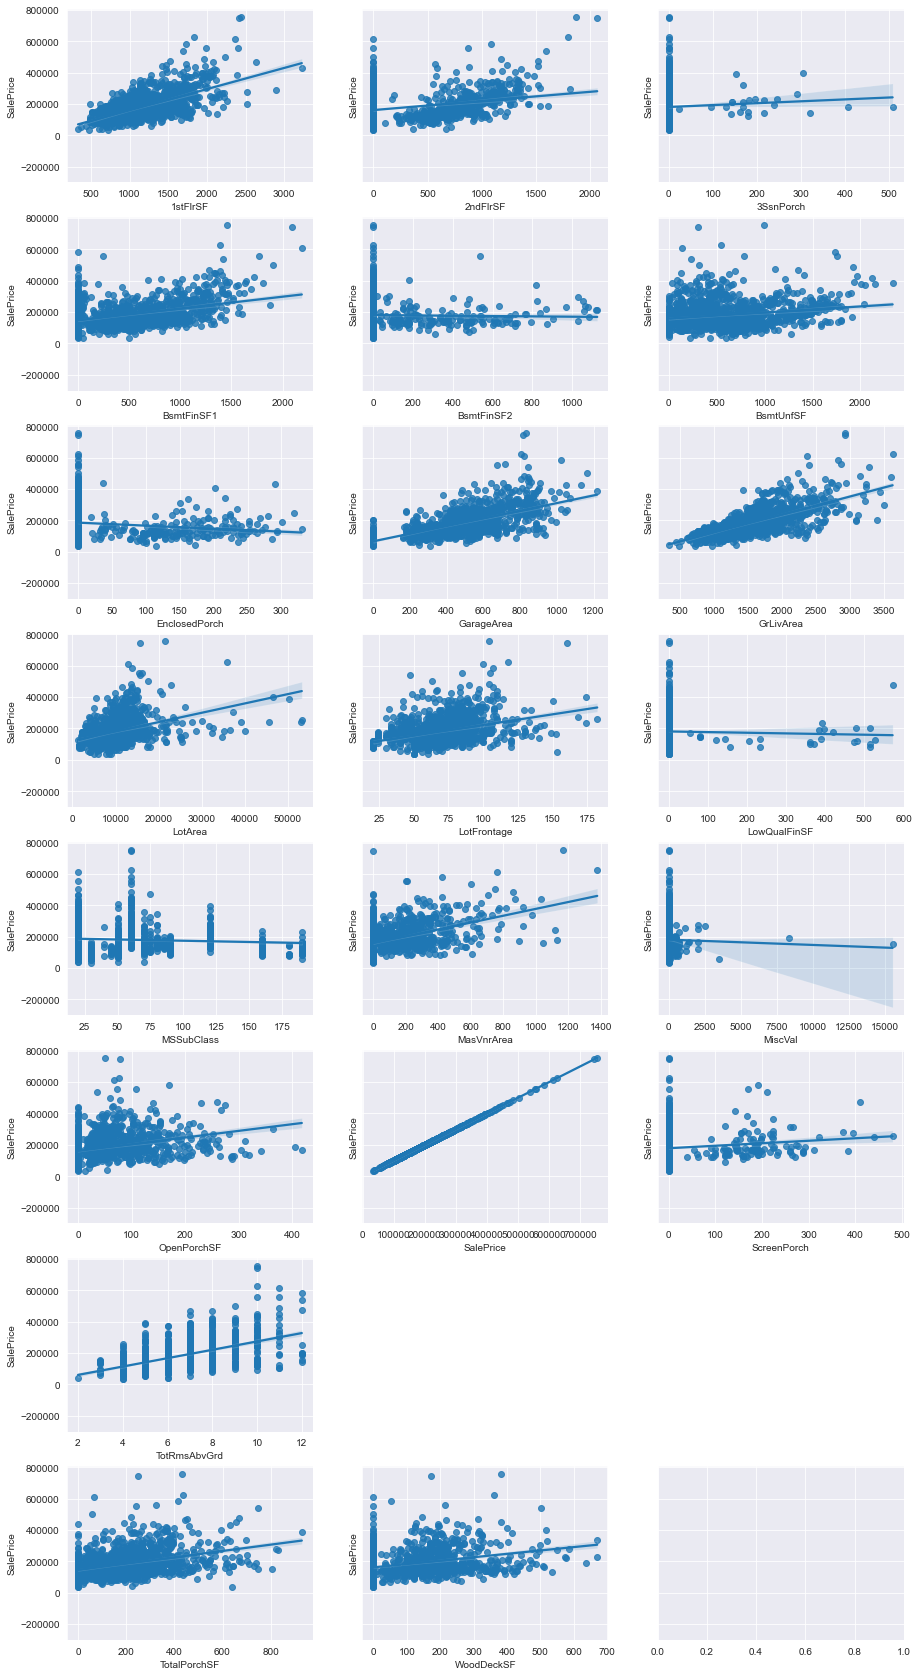

In [50]:
# define subplot columns and rows and the figure size
fig,ax = plt.subplots(math.ceil(len(numerical_features)/3),3,figsize=(15,30),sharey=True)

# initialize the row and column variable

i ,j = 0, 0
for col in sorted(numerical_features):

    # Plot a regression plot for the numerical feature and SalePrice
    sns.regplot(col,'SalePrice',data=df,ax=ax[i][j])
    if j == 2:
        j=0
        i +=1
    else:
        j +=1
        
# hide last two grids as it doesn't have any plots to show
ax[6][1].set_visible(False)
ax[6][2].set_visible(False)

Observation:

After fixing the outliers we can see the correlation better now. Lets determine which features are less correlated and drop them

    BsmtFinSF2 : It has a low correlation and hence can be dropped
    
    BsmtUnfSF : It depics less correlation towards SalePrice and hence can be dropped
    
    EnclosedPorch : Has a low and bit of negative correlation and doesn't provide much information
    
    MSSubClass : This looks like it belongs to Category variable let reassign the variable to categorical feature list
    
    

In [51]:
# drop the variables that are not in correlation with sale price
df.drop(['BsmtFinSF2','BsmtUnfSF','EnclosedPorch'],axis=1,inplace=True)
for col in ['BsmtFinSF2','BsmtUnfSF','EnclosedPorch']:
    numerical_features.remove(col)

Since MSSubClass has too many categories less reduce them to grouped label categories

In [52]:
# change the type to string 
df.MSSubClass = df.MSSubClass.astype(str)

# reducing the number of categories
df.MSSubClass.replace({'20':'1story', '30':'1story', '40':'1story', '45':'1story', '50':'1story', 
                           '60':'2story', '70':'2story', '75':'2story', '80':'nstory',
                           '85':'nstory', '90':'nstory', '120':'1story', '150':'1story',
                           '160':'2story','180':'nstory','190':'nstory'}, inplace=True)

# adding MSSubClass to catgeorical Feature list
categorical_features.append('MSSubClass')

# removing it from numerical feature list
numerical_features.remove('MSSubClass')

<br>
<h2> Analysis on Categorical Variables</h2>

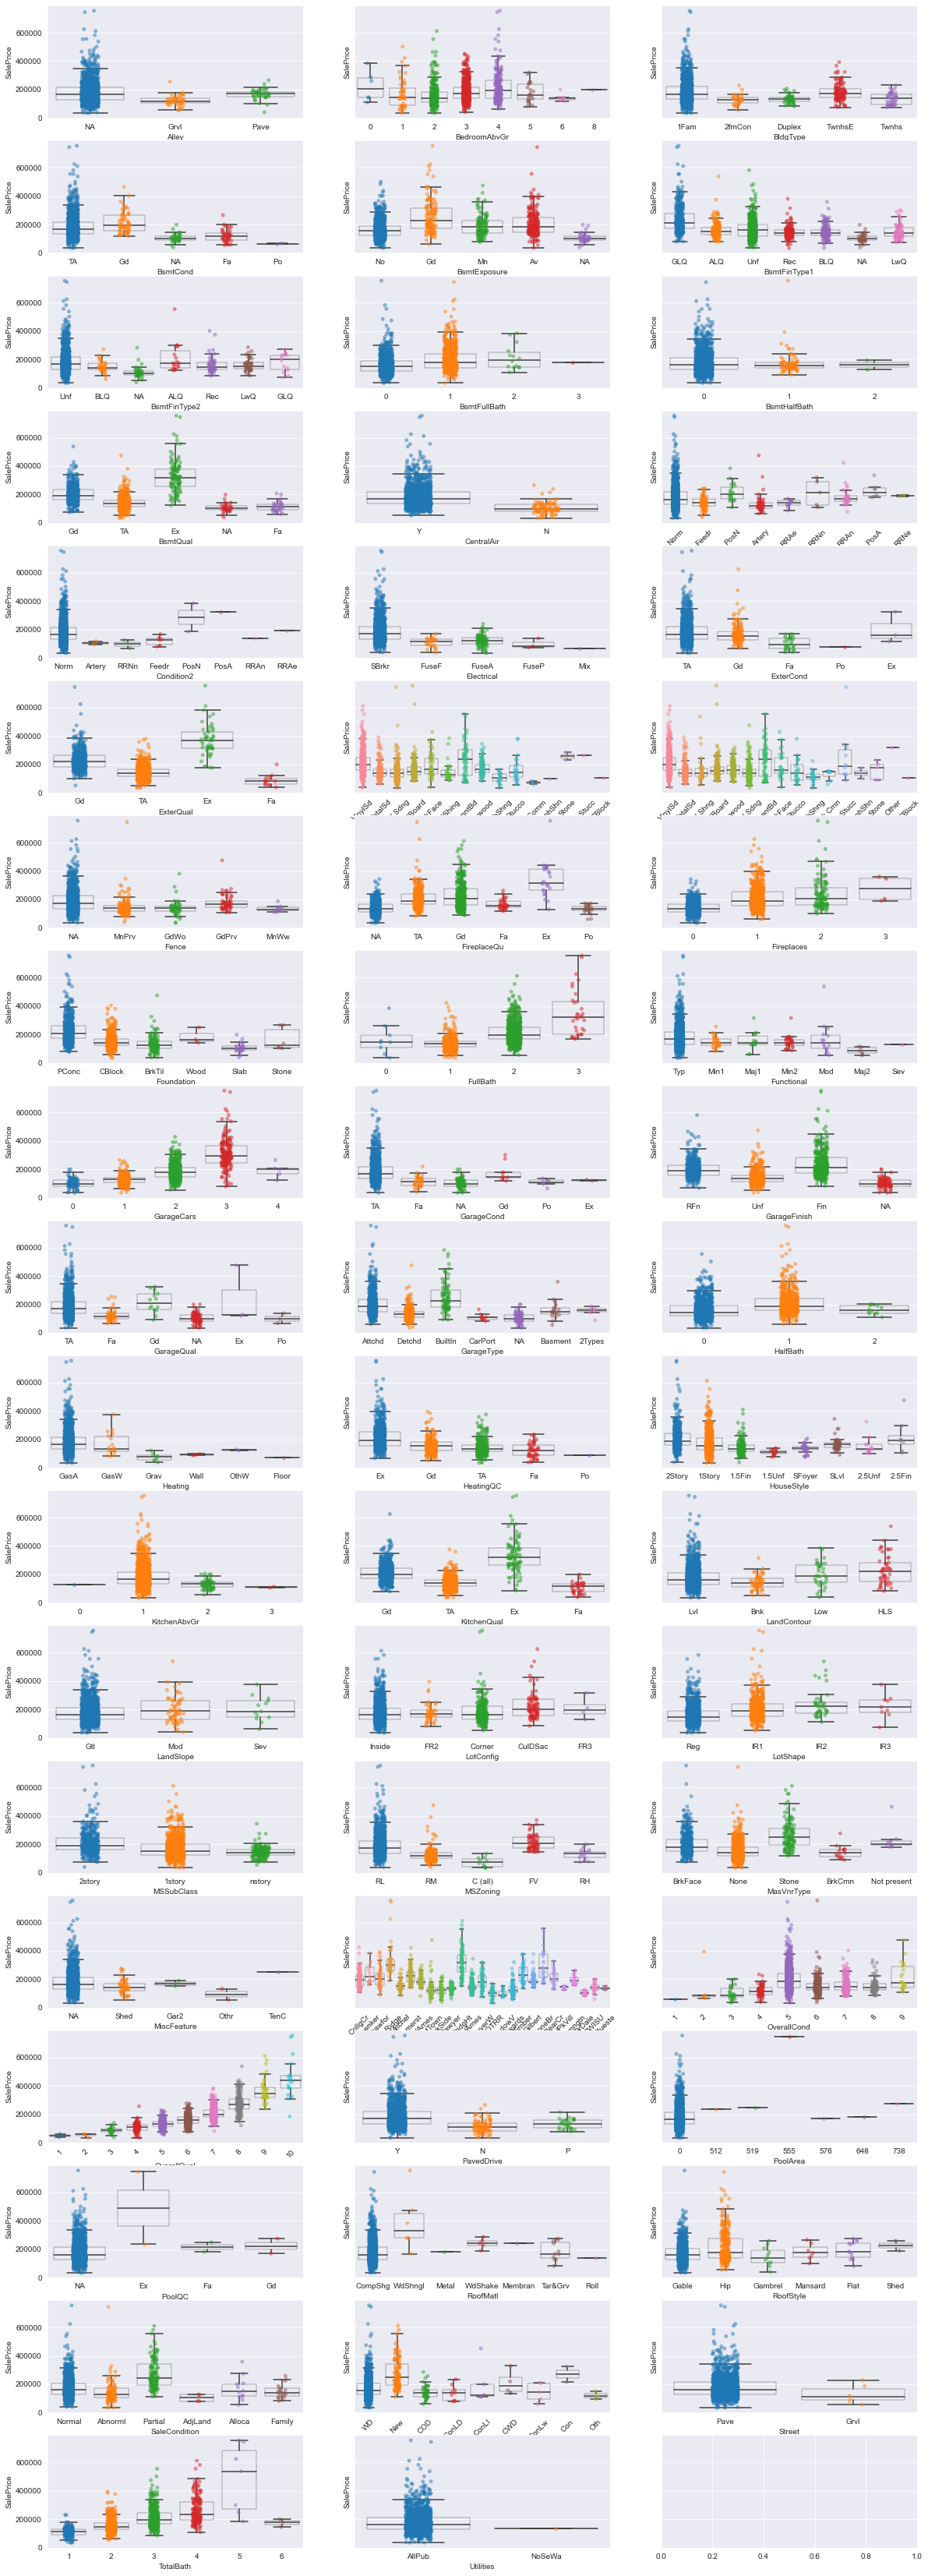

In [53]:
# define the subplots with col and row count
fig,ax = plt.subplots(math.ceil(len(categorical_features)/3),3,figsize=(20,60),sharey=True)

# initialize the row and column number
i ,j = 0, 0

# add properties to the boxplot style
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black','linewidth':0.3},
} 

for col in sorted(categorical_features):
    # plot a boxplot for SalePrice with feature
    sns.boxplot(col,'SalePrice',data=df,ax=ax[i][j],showfliers=False,**PROPS)
    
    # plot a stripplot with salePrice for the fature
    sns.stripplot(col,'SalePrice',data=df,ax=ax[i][j],alpha=0.5)
    
    # rotate the x-ticsk if the length is more
    if df[col].nunique() > 8:
        ax[i][j].tick_params(axis='x',rotation=45)
    if j == 2:
        j=0
        i +=1
    else:
        j +=1

<h2>Observation</h2>

**Combine Categories:**

    BedroomAbvGr : Combine 0 , 5 , 6 and 8
    
    BldgType : Combine 2fmCon ,Twnhs and Duplex  
    
    BsmtCond : Combine No Basement, Fa and Poor
    
    BsmtExposure : Combine Mn and Av
    
    BsmtFinType1 : Combine ALQ, Rec, BLQ and LwQ
    
    BsmtFinType2 : Combine BLQ , Rec and LwQ
    
    BsmtFullBath : Combine 2 and 3
    
    BsmtQual : Combine No Basement and Fa
    
    Condition1 : Combine RRNn and RRAn, PosN and PosA , RRNe and RRAe and Feedr and Artery
    
    Exterior2nd : Combine MetalSd, Wd Shng, HbBoard, Plywood, Wd Sdng , Stucco and combine CBlock, Other , Stone, AsphShn, ImStucc, Brk Cmn, BrkFace
    
    FireplaceQu : Combine No Fireplace, Po and Fa
    
    Foundation: Combine Wood, Slab and Stone
    
    FullBath : Combine 0 and 1
    
    GarageType: Combine Detchd, CarPort, No Garage, Basment and 2Types.
    
    GarageQual : Combine Ex and Gd , Po , Fa and No Garage
    
    HeatingQC : Combine Fa and Po
    
    House Style : Combine 2Story and 2.5Fin, SFoyer and 1.5Fin, SLvl and 1Story, 1.5Unf and 2.5Unf
    
    LotShape: Combine IR2 and IR3
    
    MSZoning : Combine RM and RH to other
    
    MasVnrType: Combine None, Not present and BrkCmn
    
    Neighborhood : combine MeadowV , BrDale and IDOTRR , Sawyer , NAmes , NPkVill , Mitchel , SWISU and Blueste , Gilbert , Blmngtn , SawyerW and NWAmes, ClearCr , CollgCr and Crawfor, Veenker, Timber and Somerst , OldTown , Edwards and BrkSide , StoneBr , NridgHt and NoRidge.
    
    OverallCond : 1, 2 and 3 , 6, 7, and 8
    
    OverallQual : 1 and 2
    
    SaleCondition: Combine AdjLand, Alloca, Family and Abnorml
    
    SaleType: Combine COD, ConLD, ConLI, CwD, ConLw, Con and Oth.
    

**Columns to Drop:**
    
    ExterCond : drop this column as mean is same for TA and Gd and other values are too less for prediction
    
    Exterior1st : The spread of data is across the price range so the correlation will be less and might not be helpful in prediction
    
    Fence : The mean is almost same for all types of fence so lets drop it
    
    LotConfig : The mean of all labels are in same range
    
    RoofStyle : Two categories has same mean with most of the datapoints
    

**Highly Correlated Features:**
    
    Fireplaces, GarageCars, HeatingQC, KitchenQual
    

<h3> Handling Nominal Categories </h2>

In [54]:
#Combine Categories that are not ordinal as ordinal catgeories 
# need to be factorized laters, hence combining nomial categorical vairables


# df.BedroomAbvGr = df.BedroomAbvGr.astype(str)
# df.BedroomAbvGr.replace({'0':'5','6':'5','8':'5'},inplace=True)
df.BldgType.replace({'2fmCon':'Twnhs','Duplex':'Twnhs'},inplace=True)
# df.BsmtCond.replace({'No Basement':'Fa','Poor':'Fa'},inplace=True)
df.BsmtExposure.replace({'Mn':'Av'},inplace=True)
# df.BsmtFinType1.replace({'ALQ':'Rec', 'BLQ':'Rec','LwQ':'Rec'},inplace=True)
# df.BsmtFinType2.replace({'BLQ':'LwQ' , 'Rec':'LwQ' },inplace=True)
# df.BsmtFullBath = df.BsmtFullBath.astype(str)
# df.BsmtFullBath.replace({'3':'2'},inplace=True)
# df.BsmtQual.replace({'No Basement' : 'Fa'},inplace=True)
df.Condition1.replace({'RRNn' : 'RRAn', 'PosN' : 'PosA' , 'RRNe' : 'RRAe' , 'Feedr' : 'Artery'},inplace=True)
df.Exterior2nd.replace({'MetalSd':'Wd Sdng', 'Wd Shng':'Wd Sdng', 'HbBoard':'Wd Sdng','Plywood':'Wd Sdng',\
                        'Stucco':'Wd Sdng' , 'CBlock': 'BrkFace','Other': 'BrkFace' , 'Stone': 'BrkFace',\
                        'AsphShn': 'BrkFace', 'ImStucc': 'BrkFace', 'Brk Cmn': 'BrkFace'},inplace=True)
# df.FireplaceQu.replace({'Po':'No Fireplace', 'Fa':'No Fireplace'},inplace=True)
df.Foundation.replace({'Wood':'Stone','Slab':'Stone'},inplace=True)
# df.FullBath = df.FullBath.astype(str)
# df.FullBath.replace({'0':'1'},inplace=True)
df.GarageType.replace({'CarPort':'Detchd', 'No Garage':'Detchd', 'Basment':'Detchd' , '2Types':'Detchd'},inplace=True)
# df.GarageQual.replace({'Ex':'NA', 'Gd':'NA' , 'Po':'NA' , 'Fa':'NA' },inplace=True)
# df.HeatingQC.replace({'Po':'Fa'},inplace=True)
# df.HouseStyle.replace({'2.5Fin':'2Story', '1.5Fin':'SFoyer', 'SLvl':'1Story', '1.5Unf': '2.5Unf'},inplace=True)
df.LotShape.replace({'IR3':'IR2'},inplace=True)
df.MSZoning.replace({'RH':'RM'},inplace=True)
df.MasVnrType.replace({'None':'BrkCmn', 'Not present':'BrkCmn'},inplace=True)
df.Neighborhood.replace({'BrDale':'MeadowV' , 'IDOTRR':'MeadowV' ,\
                         'NAmes':'Sawyer' , 'NPkVill':'Sawyer' , 'Mitchel':'Sawyer' , 'SWISU':'Sawyer', 'Blueste':'Sawyer' ,\
                         'Blmngtn':'Gilbert' , 'SawyerW':'Gilbert', 'NWAmes':'Gilbert',\
                         'ClearCr':'Crawfor' , 'CollgCr' :'Crawfor',\
                         'Timber':'Veenker', 'Somerst':'Veenker' ,\
                         'Edwards':'OldTown', 'BrkSide':'OldTown' ,\
                         'StoneBr' : 'NridgHt' , 'NoRidge': 'NridgHt'},inplace=True)
# df.OverallCond = df.OverallCond.astype(str)
# df.OverallCond.replace({'2': '3','1':'3', '6': '7', '8':'7'},inplace=True)
# df.OverallQual = df.OverallQual.astype(str)
# df.OverallQual.replace({'1':'2'},inplace=True)
df.SaleCondition.replace({'AdjLand':'Abnorml', 'Alloca':'Abnorml', 'Family' :'Abnorml'},inplace=True)
df.SaleType.replace({'ConLD':'COD', 'ConLI':'COD', 'CwD':'COD', 'ConLw':'COD', 'Con':'COD', 'Oth':'COD'},inplace=True)

dropping the categorical features that are less correlated .ie has same mean across all its labels

In [55]:
# add columns to drop
drop_columns = ['ExterCond', 'Fence', 'LotConfig' ,'RoofStyle' ,'Exterior1st']

# drop the selected features
df.drop(columns=drop_columns,inplace=True)

# remove the dropped columns from categorical feature list
for cat in drop_columns[:]:
    categorical_features.remove(cat)

<br>
<h2> Time Series Analysis</h2>

In [56]:
# list down the variables for time series
timeseries_features

['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt']

In [57]:
df[timeseries_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1459 non-null   int64  
 1   YearRemodAdd  1459 non-null   int64  
 2   YrSold        1459 non-null   int64  
 3   MoSold        1459 non-null   int64  
 4   GarageYrBlt   1459 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


In [58]:
# change the types to integer
df.YrSold = df.YrSold.astype(int)
df.GarageYrBlt = df.GarageYrBlt.astype(int)

In [59]:
# create a derieved column date sold by combining month sold and year sold
df['dateSold'] = df['MoSold'].astype(str)+'-1-'+df['YrSold'].astype(str)
df['dateSold'] =pd.to_datetime(df['dateSold'])

# add the new column to timeseries list
timeseries_features.append('dateSold')

In [60]:
# preview the new column
df['dateSold'].head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: dateSold, dtype: datetime64[ns]

In [61]:
df.loc[df.GarageYrBlt < 1900,['GarageYrBlt','YearBuilt']]

GarageYrBlt  YearBuilt
1137         1875       1875
1348         1872       1872

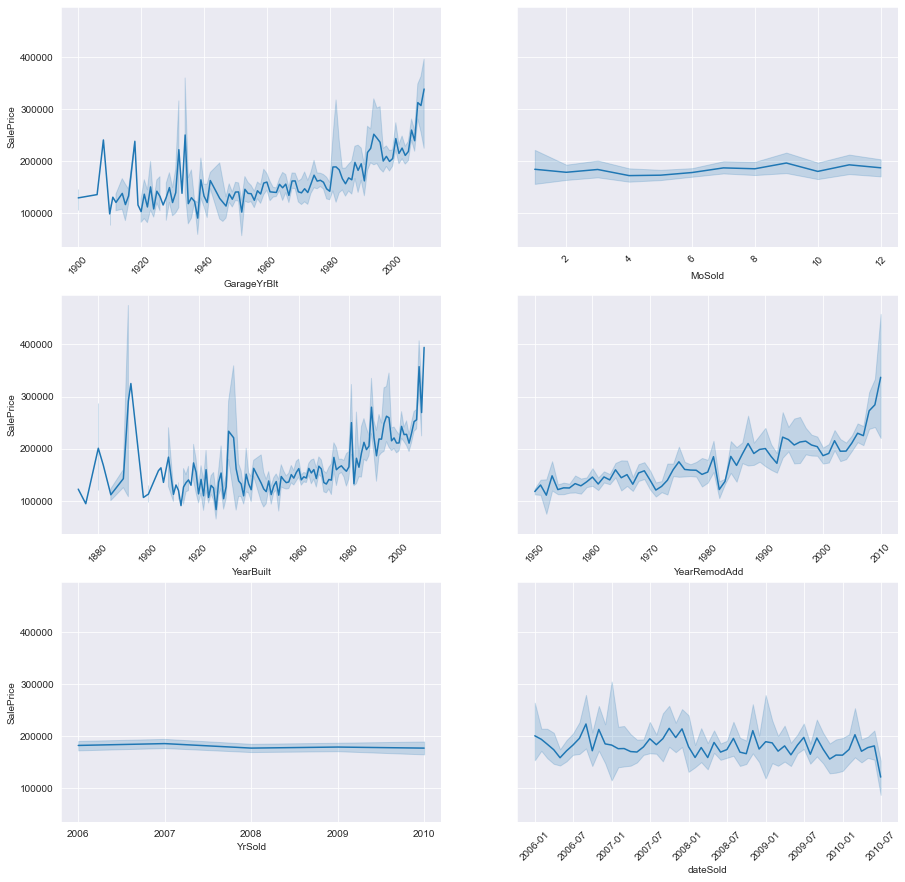

In [62]:
# define the subplot iwth number of rows and columns and the figure size accordingly
fig,ax = plt.subplots(math.ceil(len(timeseries_features)/2),2,figsize=(15,15),sharey=True)

# initialize the row and column index
i ,j = 0, 0
for col in sorted(timeseries_features):
    if col == 'GarageYrBlt':
        # create a line plot for GarageYrBlt with SalePrice for year
        # greater than 1880 as there are only two data available below this year
        sns.lineplot(df.loc[df[col] >= 1880,col],df.loc[df[col] != 0,'SalePrice'],ax=ax[i][j])
    else:
        # create a line plot for the time data with SalePrice
        sns.lineplot(col,'SalePrice',data=df,ax=ax[i][j])
    
    # if the x-ticks are more rotate the labels
    if df[col].nunique() > 8:
        ax[i][j].tick_params(axis='x',rotation=45)
    if col == "YrSold":
        ax[i][j].xaxis.set_ticks([2006,2007,2008,2009,2010])
    if j == 1:
        j=0
        i +=1
    else:
        j +=1

In [63]:
# reorder the sale price to the end for ease of visualiation in heat map
df_dummy = df.pop('SalePrice')
df.insert(df.shape[1],'SalePrice',df_dummy)
del df_dummy

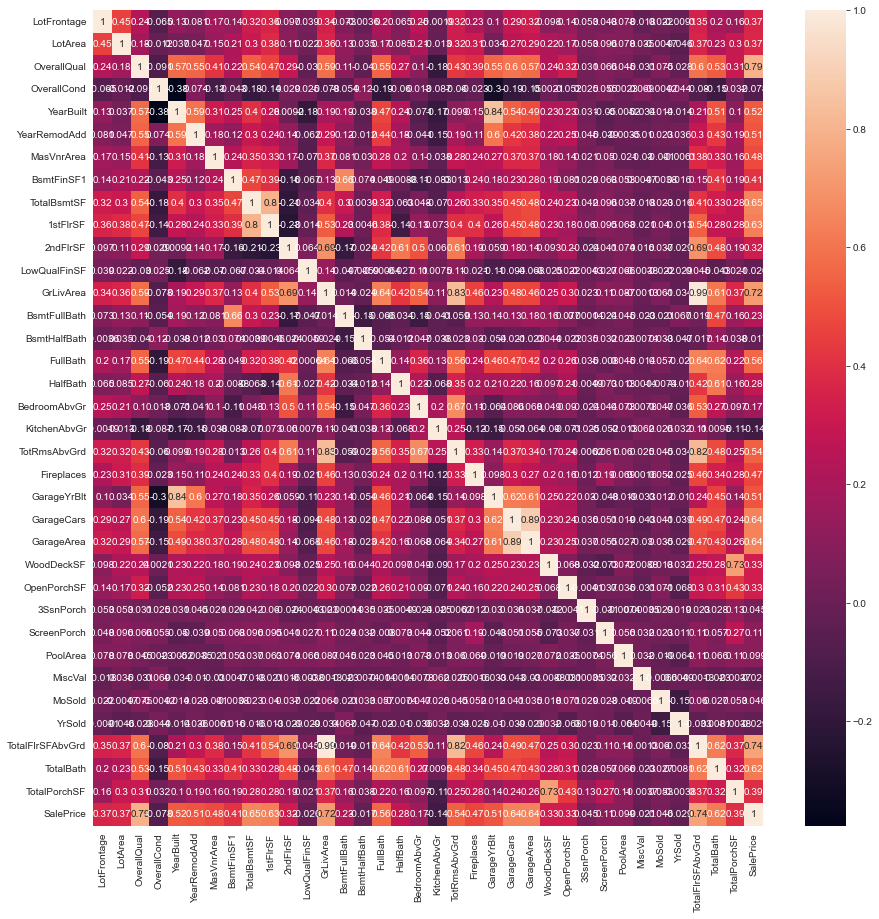

In [64]:
# set figure size
plt.figure(figsize=(15,15))

# plot correlation heatmap
sns.heatmap(df.corr(),annot=True);

In [65]:
# drop MoSold and YrSold as they are almost zero correlated
df.drop(['MoSold','YrSold'],axis=1,inplace=True)
for col in ['MoSold','YrSold']:
    timeseries_features.remove(col)

<br>
<h2> Encoding Category Labels <h2>

In [66]:
# reset these categorical numerical variables to integer 
df[['HalfBath','Fireplaces','FullBath','BsmtFullBath','GarageCars','BedroomAbvGr','OverallCond','OverallQual']] = df[['HalfBath','Fireplaces','FullBath','BsmtFullBath','GarageCars','BedroomAbvGr','OverallCond','OverallQual']].astype(int)

In [67]:
# assign the categorical columns that are non integer to categorical_columns as a list
categorical_columns =['ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','HouseStyle','BsmtFinType2','BsmtFinType1','GarageFinish']

<h3> Manual Ordinal Data Encoding</h3>

Converting the Object category featurs to Categorical data type for encoding

In [68]:
# assign the labels in the order of decreasing to increasing as when creating a categorical feature
# Converting normal Object features to Categorical Data Type features
df['ExterQual']=pd.Categorical(df['ExterQual'],ordered=True,categories=['Fa','TA','Gd','Ex'])
df['BsmtQual']=pd.Categorical(df['BsmtQual'],ordered=True,categories=['NA','Fa','TA','Gd','Ex'])
df['BsmtCond']=pd.Categorical(df['BsmtCond'],ordered=True,categories=['NA','Po','Fa','TA','Gd'])
df['HeatingQC']=pd.Categorical(df['HeatingQC'],ordered=True,categories=['Po','Fa','TA','Gd','Ex'])
df['KitchenQual']=pd.Categorical(df['KitchenQual'],ordered=True,categories=['Fa','TA','Gd','Ex'])
df['FireplaceQu']=pd.Categorical(df['FireplaceQu'],ordered=True,categories=['NA','Po','Fa','TA','Gd','Ex'])
df['GarageQual']=pd.Categorical(df['GarageQual'],ordered=True,categories=['NA','Po','Fa','TA','Gd','Ex'])

In [69]:
df['GarageFinish'] = pd.Categorical(df['GarageFinish'],ordered=True,categories=['NA','Unf','RFn','Fin'])

In [70]:
df['BsmtFinType1']=pd.Categorical(df['BsmtFinType1'],ordered=True,categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])
df['BsmtFinType2']=pd.Categorical(df['BsmtFinType2'],ordered=True,categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])

In [71]:
df['HouseStyle']=pd.Categorical(df['HouseStyle'],ordered=True,categories=[ 'SFoyer','1.5Unf','1Story','1.5Fin','SLvl','2.5Unf','2Story','2.5Fin'])

**Explenation:**
<pre>Now as we have converted all these ordinal vaiables to Categorical Data Type features with ordered relation. Lets convert the labels to integers.

The integers are assigned bsaed on the order for example for lowest category it will assign zero and highest catgoery it will assign the nth position form zero.

Example: For **FireplaceQu**

['NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex'] : Categorical Data Type

[  0  <   1  <  2   <  3   <  4   <  5  ] : Integer Representation</pre>

In [72]:
# factorize the categories to Integer representation
for col in categorical_columns:
    code, _ = pd.factorize(df[col],sort=True)
    df[col] = pd.Series(code)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   MSSubClass        1459 non-null   object        
 1   MSZoning          1459 non-null   object        
 2   LotFrontage       1459 non-null   float64       
 3   LotArea           1459 non-null   int64         
 4   Street            1459 non-null   object        
 5   Alley             1459 non-null   object        
 6   LotShape          1459 non-null   object        
 7   LandContour       1459 non-null   object        
 8   Utilities         1459 non-null   object        
 9   LandSlope         1459 non-null   object        
 10  Neighborhood      1459 non-null   object        
 11  Condition1        1459 non-null   object        
 12  Condition2        1459 non-null   object        
 13  BldgType          1459 non-null   object        
 14  HouseStyle        1459 n

In [74]:
# reassign the categorical features 
categorical_features = list(df.select_dtypes(include=[np.object]).columns.values)

In [75]:
df.shape

(1459, 74)

We have brounght down to 53 columns finally but we still have to convert few categories to dummy variable creation

<br>
<h2> Dummy Variable Creation <h2>

Lets create dummy variables for the remaing categorical features.

As the labels in these categorical variable are shrinked to lower number the number of features generated will be less

In [76]:
# print the shape of categorical columns and the number of created dummy columns
pd.get_dummies(df[categorical_features],drop_first=True).shape,len(categorical_features)

((1459, 92), 28)

From the above column count 29 new columns will be added to our final dataFrame

In [77]:
# created dummy variables for categorical features
house_price = pd.concat([df,pd.get_dummies(df[categorical_features],drop_first=True)],axis=1)

In [78]:
# drop the actual categorical feature from list
house_price.drop(columns=categorical_features,inplace=True)

In [79]:
house_price

LotFrontage  LotArea  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0            65.0     8450           6            7            5       2003   
1            80.0     9600           2            6            8       1976   
2            68.0    11250           6            7            5       2001   
3            60.0     9550           6            7            5       1915   
4            84.0    14260           6            8            5       2000   
...           ...      ...         ...          ...          ...        ...   
1454         62.0     7917           6            6            5       1999   
1455         85.0    13175           2            6            6       1978   
1456         66.0     9042           6            7            9       1941   
1457         68.0     9717           2            5            6       1950   
1458         75.0     9937           2            5            6       1965   

      YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  ...  PoolQC_NA  \
0             2003       196.0          2         3  ...          1   
1             1976         0.0          1         3  ...          1   
2             2002       162.0          2         3  ...          1   
3             1970         0.0          1         2  ...          1   
4             2000       350.0          2         3  ...          1   
...            ...         ...        ...       ...  ...        ...   
1454          2000         0.0          1         3  ...          1   
1455          1988       119.0          1         3  ...          1   
1456          2006         0.0          3         2  ...          1   
1457          1996         0.0          1         2  ...          1   
1458          1965         0.0          2         2  ...          1   

      MiscFeature_NA  MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  \
0                  1                 0                 0                 0   
1                  1                 0                 0                 0   
2                  1                 0                 0                 0   
3                  1                 0                 0                 0   
4                  1                 0                 0                 0   
...              ...               ...               ...               ...   
1454               1                 0                 0                 0   
1455               1                 0                 0                 0   
1456               0                 0                 1                 0   
1457               1                 0                 0                 0   
1458               1                 0                 0                 0   

      SaleType_CWD  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0                0             0            1                     1   
1                0             0            1                     1   
2                0             0            1                     1   
3                0             0            1                     0   
4                0             0            1                     1   
...            ...           ...          ...                   ...   
1454             0             0            1                     1   
1455             0             0            1                     1   
1456             0             0            1                     1   
1457             0             0            1                     1   
1458             0             0            1                     1   

      SaleCondition_Partial  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
1454                      0  
1455                      0  
1456                      0  
1457                      0  
1458                      0  

[1459 rows x 138 columns]

In [80]:
# reset index for the new dataframe
house_price.reset_index(drop=True,inplace=True)

<h3> Handling DATE Object </h3>

We have one more data to clean up that is our date object. For model to use dat object we need to convert it to integer. Thinking about it we have a way to conver ti to integer... Ofcourse thats unixtimestamp

In [81]:
# preview the dateSold feature
house_price.dateSold.head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: dateSold, dtype: datetime64[ns]

In [82]:
#We need time HH:MM:SS to be added to date to convert it unixtimestamp

# lets create a constant time
tm = datetime.time(10,10)

# convert the dateSold to unixstimestamp
house_price.dateSold = house_price.dateSold.apply(lambda x: datetime.datetime.combine(x, tm).timestamp())

In [83]:
house_price.dateSold.head()

0    1.201832e+09
1    1.177985e+09
2    1.220235e+09
3    1.138760e+09
4    1.228097e+09
Name: dateSold, dtype: float64

In [84]:
# reassigning all the numerical features to the numerical_features variable as a list
numerical_features = list(df.select_dtypes(include=[np.number]).columns.values)

<h1> Data Preparation </h1>
    
<h3> Our data has been cleaned and now tuned with 81 independent variables and 1 Target variable</h3>

Split the independent features and target feature to x and y respectively

In [85]:
house_price.shape

(1459, 138)

In [86]:
# extract the target fesature out from dataFrame
y = house_price.pop('SalePrice')
# assign the independent variables to x
X = house_price

# remove the target feature from numerical features before we perform scaling
numerical_features.remove('SalePrice')

Lets split the data to train and test data with sklearn liberary.

Lets defien the test size as 30% and train data size as 70%

In [87]:
# split the data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

<h2> Feature Scaling</h2>

In [88]:
# create a StandardScaler object
scaler = StandardScaler()

# Fit and transform our train data with Standard Scaler
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# transform our test data with the same scaler object
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [89]:
X_train.head()

LotFrontage   LotArea  HouseStyle  OverallQual  OverallCond  YearBuilt  \
1453    -0.393733 -0.522217   -0.748659     0.661837    -0.485974   1.084801   
1099     0.551285  0.340015   -0.748659     0.661837    -0.485974   0.216686   
416      0.173278 -0.454499    1.401497    -0.062424     1.344947   0.216686   
1168     2.346818  0.703806    1.401497    -0.062424     1.344947  -1.219044   
670     -0.299231 -0.299179    1.401497    -0.062424    -0.485974   1.118190   

      YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  ...  PoolQC_NA  \
1453      0.986677   -0.573037   1.064789  0.619690  ...          1   
1099     -0.334339    0.640253  -0.694353  0.619690  ...          1   
416      -0.334339    0.622583  -0.694353 -0.668912  ...          1   
1168      0.057073   -0.573037  -0.694353 -0.668912  ...          1   
670       0.986677   -0.573037   1.064789  0.619690  ...          1   

      MiscFeature_NA  MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  \
1453               1                 0                 0                 0   
1099               1                 0                 0                 0   
416                1                 0                 0                 0   
1168               1                 0                 0                 0   
670                1                 0                 0                 0   

      SaleType_CWD  SaleType_New  SaleType_WD  SaleCondition_Normal  \
1453             0             0            1                     1   
1099             0             0            0                     0   
416              0             0            1                     1   
1168             0             0            1                     1   
670              0             0            1                     1   

      SaleCondition_Partial  
1453                      0  
1099                      0  
416                       0  
1168                      0  
670                       0  

[5 rows x 137 columns]

In [90]:
y_train.head()

1453    185000
1099    157000
416     149500
1168    235000
670     173500
Name: SalePrice, dtype: int64

<br>
<h1> Model Building </h1>

<h2>Linear Regression</h2>

Lets first build a Linear Regression model with the number of features we have to check if it overfits

In [91]:
# creating linar regressor
lr = LinearRegression()

# Initializing our model with the predictors and target features 
lr.fit(X_train,y_train)

# Predcting values in our train data set
y_train_pred = lr.predict(X_train)

print('\nIntercept:', lr.intercept_)
print('Coefficients:', lr.coef_)
print('\n\nTrain results \n')
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_train, y_train_pred)))
print('Residual Sum of Squares (RSS): {:.2f}'.format(np.sum(np.square(y_train - y_train_pred))))

# Predicting values for our test data
y_test_pred = lr.predict(X_test)
print('\n\nTest results \n')
print('Test Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Test Coefficient of Determination (R2): {:.2f}'.format(r2_score(y_test, y_test_pred)))
print('Test Residual Sum of Squares (RSS): {:.2f} \n'.format(np.sum(np.square(y_test - y_test_pred))))


Intercept: -1067550.0581416846
Coefficients: [ 3.21626433e+02  5.45881196e+03 -2.67593410e+03  1.11304744e+04
  6.29694138e+03  2.24819795e+03  1.75077785e+01  6.82511757e+03
  2.42909144e+03  5.75026584e+03 -1.36206556e+03  1.00551422e+03
  6.22307801e+03  6.66851241e+02  6.05786126e+03  1.78382575e+03
 -3.54858479e+04 -4.83110775e+04  7.40369797e+03 -5.87159974e+04
  7.68520083e+02 -8.94510026e+02  7.76309026e+02  1.02698460e+03
 -5.83396116e+03 -4.07024988e+03  3.93476690e+03  7.05385130e+03
  1.29767880e+03 -1.20690019e+03 -1.02439321e+03  1.03346466e+02
  1.74395116e+03  4.83948565e+03  4.07540079e+03  2.68846733e+03
  1.01456787e+03  6.28979508e+02  2.39851588e+03  6.45116449e+04
  1.46885676e+03  1.39217599e+05  1.20823640e+03 -1.10881590e+03
  6.10189090e-06  2.77039208e+03 -7.34579761e+02  2.86899139e+04
  2.07588105e+04  2.17881453e+04  1.71559526e+04  6.24622019e+03
  1.10632582e+04  6.49010334e+03 -1.34225166e+02  3.32948572e+03
 -9.93615679e+03 -3.68064761e+03  2.55681698

Lets calculate and store the outputs in a metric variable

In [92]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

# initialize a list
metric = []

# calcuate R2 Score for Training data
metric.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric.append(len(X_train.columns))

# add the alpha value if present
metric.append(0)

<h3>Observation:</h3>

    Our model output has higher R2 score in train data and lower R2 score in test data with a huge difference. Hence it clearly **overfits**.
    
    There are several ways to overcome this problem:
        - reduce the number of features to has the model simple(less complex) using RFE
        - Ridge regression can reduce the coeff values a lot and use the hyper parameter(alpha) to tune the model
        - Use Lasso regression to reduce the improve the model best fit by reducing the coeff to zero to reject the features, this helps in selceting the features for out model with teh use of hyper parameter

<H2> Feature Selection</H2>
<h3> Analysis the Correlated Features </h3>

Before we use RFE lets analyse the top correlated features

In [93]:
# perform correlation on the train data set for the predictor
correlation_df = pd.concat([X_train,y_train],axis=1)

In [94]:
# Creating a method to get the top correlated features
def get_top_corr_features():
    # creating a correlation list for the top features with SalesPrice
    corr_cols = correlation_df.corr().loc[:,'SalePrice'].sort_values(ascending=False)
    corr_cols = corr_cols.reset_index()
    # order the data with positive corr first and negative corr last
    corr_cols = corr_cols[corr_cols.SalePrice>0].append(corr_cols[corr_cols.SalePrice<0])
    return corr_cols

In [95]:
# get teh top 30 +ve corelation appended with top 25 most +ve corr freature and lastly the reaming features
corr_cols = get_top_corr_features().head(30).append(get_top_corr_features().tail(25).sort_values('SalePrice',ascending=True)).append(get_top_corr_features().iloc[30:57])[1:].reset_index(drop=True)
# rename columns
corr_cols.columns = ['Corr Feature','SalePrice Corr']
# preview the result
corr_cols[corr_cols['Corr Feature'].isin(['2ndFlrSF',
 'Condition1_PosA',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_VinylSd',
 'LotShape_IR2',
 'MSZoning_FV',
 'SaleCondition_Partial',
 'SaleType_CWD'])]

Corr Feature  SalePrice Corr
26  SaleCondition_Partial        0.373156
28               2ndFlrSF        0.354138
60    Exterior2nd_VinylSd        0.303370
79    Exterior2nd_CmentBd        0.131511

<h2>RFE</h2>

In [96]:
# Reordering the columns based on correlation so when performing RFE build by adding feature on by one noise features will be added only at the end
X_train = X_train[corr_cols['Corr Feature']]
X_test = X_test[corr_cols['Corr Feature']]

Reducing the number of features to 50 using RFE

In [97]:
# create a Linear model for RFE
lm_rfe = LinearRegression()

# fit the train and test data to linaer model
lm_rfe.fit(X_train,y_train)

# create RFE for our Linear Regressor Model and reduce to 50 features
rfe = RFE(lm_rfe,50)

# fit the train and test data to RFE
rfe = rfe.fit(X_train,y_train)

RFE gives a rank with number , the number that are greater than one can be dropped. The selected columns shows true to retain and false to reject.

In [98]:
# print the rank of each features
pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns=['Feature','Selected','Rank']).sort_values('Rank')

Feature  Selected  Rank
0            OverallQual      True     1
31  Neighborhood_OldTown      True     1
34   Neighborhood_Sawyer      True     1
38         GarageCond_NA      True     1
39         GarageType_NA      True     1
..                   ...       ...   ...
25          TotalPorchSF     False    28
36           SaleType_WD     False    29
14          GarageFinish     False    30
68      Electrical_SBrkr     False    31
33           MSZoning_RM     False    32

[81 rows x 3 columns]

In [99]:
# lets extract the top 50 selected columns by RFE
rfe_selected_columns = X_train.columns[rfe.support_]

In [100]:
# Top 50 correlated feature list
corr_selected_columns = get_top_corr_features().head(25).append(get_top_corr_features().tail(25).sort_values('SalePrice',ascending=True))[1:].reset_index(drop=True)
# rename the columns
corr_selected_columns.columns = ['Corr_feature','SalePrice_Corr']

In [101]:
# Sort the DataFrame based on the column name
corr_selected_columns = corr_selected_columns.sort_values(by='Corr_feature').reset_index(drop=True)
# Sort the Sereis based on the feature name
rfe_selected_columns = pd.Series(sorted(rfe_selected_columns),name='RFE')
# make a inner join and merge to get the common features
corr_rfe_features = pd.merge(left=rfe_selected_columns,right=corr_selected_columns,how='inner',\
                             left_on='RFE',right_on='Corr_feature').sort_values(by='SalePrice_Corr',ascending=False).reset_index(drop=True)

In [102]:
corr_rfe_features

RFE          Corr_feature  SalePrice_Corr
0            OverallQual           OverallQual        0.780560
1       TotalFlrSFAbvGrd      TotalFlrSFAbvGrd        0.753369
2              GrLivArea             GrLivArea        0.720807
3            KitchenQual           KitchenQual        0.663362
4              ExterQual             ExterQual        0.661228
5             GarageArea            GarageArea        0.652569
6            TotalBsmtSF           TotalBsmtSF        0.641573
7               1stFlrSF              1stFlrSF        0.629683
8               BsmtQual              BsmtQual        0.622210
9   Neighborhood_NridgHt  Neighborhood_NridgHt        0.592287
10          TotRmsAbvGrd          TotRmsAbvGrd        0.559555
11            MasVnrArea            MasVnrArea        0.511303
12          YearRemodAdd          YearRemodAdd        0.510700
13             YearBuilt             YearBuilt        0.510321
14      Foundation_PConc      Foundation_PConc        0.486664
15            BsmtFinSF1            BsmtFinSF1        0.426775
16       Functional_Min2       Functional_Min2       -0.089382
17          Heating_Grav          Heating_Grav       -0.094870
18      MiscFeature_Shed      MiscFeature_Shed       -0.102967
19      Foundation_Stone      Foundation_Stone       -0.115843
20      Electrical_FuseF      Electrical_FuseF       -0.130583
21          KitchenAbvGr          KitchenAbvGr       -0.132158
22             PoolQC_NA             PoolQC_NA       -0.134031
23       BsmtExposure_NA       BsmtExposure_NA       -0.145504
24        BldgType_Twnhs        BldgType_Twnhs       -0.159283
25  SaleCondition_Normal  SaleCondition_Normal       -0.185046
26  Neighborhood_MeadowV  Neighborhood_MeadowV       -0.207591
27         GarageType_NA         GarageType_NA       -0.218710
28         GarageCond_NA         GarageCond_NA       -0.218710
29   Neighborhood_Sawyer   Neighborhood_Sawyer       -0.278124
30  Neighborhood_OldTown  Neighborhood_OldTown       -0.321565
31     Foundation_CBlock     Foundation_CBlock       -0.335654
32     GarageType_Detchd     GarageType_Detchd       -0.364031

<h3>OLS Model</h3>

In [103]:
# this function can be resued to build ols model for given features
def build_model(X_train_rfe):
    # adding a constant variable for intercept
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Initialize an OLS model for our dataset and fit the data to model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    # view the summary of the model for selected features
    print(lm.summary())

    return lm

<h3> VIF Analysis </h3>

The VIF score should be below 5 for an ideal model.

In [104]:
def VIF(X_train_rfe):
    # create a dummy dataframe
    vif = pd.DataFrame(columns=['Features','VIF'])
    
    # extract the column values to vif features column value
    vif['Features'] = X_train_rfe.columns

    # calculate vif for the train data for the added features
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    
    # round the value to 2 decimals
    vif['VIF'] = round(vif['VIF'], 2)
    
    # sort values by hightevif value first
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # print vif table
    display(vif)
    
    # retrun vif object
    return vif

We have two way to build a model to find the best features selected by RFE that would fit.
<ul><li>Dropping a feature one by one from the model built with 50 features until it shows good performane without overfitting</li><li>Adding a feature one by one to the model until it shows a good performance metrics</li></ul>

Lets add features one by one and build our model

Lets create a custom logic based on the below condition

<table>
<tr><th style="text-align:center">Order</th><th style="text-align:center">P-value</th><th style="text-align:center">VIF</th><th style="text-align:center">Action</th></tr>
<tr><td>1</td><td>High</td><td>High</td><td>Drop these columns First</td></tr>
<tr><td>2</td><td>High</td><td>Low</td><td>Drop these columns one by one, because this could lower the VIF values of other columns to prevent it from being dropped in next step </td></tr>
<tr><td>3</td><td>Low</td><td>High</td><td>Drop the colums with VIF greater than 5</td></tr>
<tr><td>4</td><td>Low</td><td>Low</td><td>Keep these features</td></tr>
</table>	

In [105]:
def perform_feature_selection(train_data,rfe=False,corr=False):
    # create a empty data frame for xtrain and vif
    X_train_rfe = pd.DataFrame()
    vif = pd.DataFrame()

    # creating this object to ignore vif for a single feature
    count = 1

    # created this varible to stop the outer loop of adding futher features for model
    stop = False

    # prev r2score
    r2score = 0.0

    # fetch the features based on corr/rfe selection
    if rfe:
        cols = rfe_selected_columns
    elif corr:
        cols = corr_selected_columns.Corr_feature
    else: 
        cols = corr_rfe_features.RFE.values
        
    for col in cols:
    #for v in rfe_selected_columns:

        # add the column to the traing data set
        if col in train_data.columns.values:
            X_train_rfe[col] = train_data[col]

            # rebuild the model again to ckeck for high vifs and p-values 
            # once a feature is dropped on the above conditions after adding 
            # the new feature from the previous step to the model
            while True:
                # build the model
                lm = build_model(X_train_rfe)

                # Drop the previous column if r2score doesn't increase
                if round(r2score,3) == round(lm.rsquared,3):

                    print("\n\n Dropping "+X_train_rfe.columns.values[-1]+" and rebuilding the model as it did not add any info to model \n\n")

                    X_train_rfe.drop(X_train_rfe.columns.values[-1],axis=1, inplace=True)
                    
                    # build the model again as we have removed a feature 
                    lm = build_model(X_train_rfe)

                # Assign new r2score to check for the next build on adding new feature
                r2score = lm.rsquared

                # ignore vif and p-value check since there will
                # be only 1 column on first iteration
                if count != 1:

                    # calculate VIF
                    vif = VIF(X_train_rfe)

                    # if the model reaches required r2 score stop the model from executing furher steps
                    if lm.rsquared >= 0.90:
                        stop = True
                        break

                    # Check if the p-value if high
                    if (lm.pvalues > 0.05).sum() > 0:

                        # extract feature fo high p-value
                        feature = lm.pvalues[lm.pvalues > 0.05].index

                        # check if this feature is not const
                        if feature[0] != 'const':

                            # if the VIF value is aslo high drop this columns first
                            if feature[0] in vif.loc[vif.VIF > 5,'Features']:
                                X_train_rfe.drop(feature[0],axis=1,inplace=True)                # order 1
                            else:
                                # if only the p-value is high drop it
                                X_train_rfe.drop(feature[0],axis=1,inplace=True)                # order 2

                        # if the p-value column is 2nd in the list extract 
                        # that feature name to drop if from dataset if there is 
                        # a third value with high p-value it will be
                        # validated in the next loop after rebuild on dropping the current feature
                        elif (feature[0] == 'const') & (len(feature) > 1):
                            X_train_rfe.drop(feature[1],axis=1,inplace=True)                    # order 2

                    # if VIF value is high drop it
                    if ((vif.VIF > 5).sum() > 0) & (col in X_train_rfe.columns.values):
                        X_train_rfe.drop(col,axis=1,inplace=True)   # order 3
                    else:
                        break                                                                   # order 4
                else:
                    break
            # stop the process
            if stop:
                break

            # increment count on adding new feature
            count = count + 1
            
    return X_train_rfe

In [106]:
X_train_rfe = perform_feature_selection(X_train,corr=True)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     669.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.12e-114
Time:                        19:34:26   Log-Likelihood:                -12738.
No. Observations:                1021   AIC:                         2.548e+04
Df Residuals:                    1019   BIC:                         2.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.822e+05   1985.889     91.743      0.0

Features  VIF
0        1stFlrSF  1.0
1  BldgType_Twnhs  1.0

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.02e-125
Time:                        19:34:26   Log-Likelihood:                -12706.
No. Observations:                1021   AIC:                         2.542e+04
Df Residuals:                    1017   BIC:                         2.544e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.867e+05   2011.510     

Features   VIF
1   BldgType_Twnhs  1.06
2  BsmtExposure_NA  1.06
0         1stFlrSF  1.00

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          5.25e-131
Time:                        19:34:26   Log-Likelihood:                -12689.
No. Observations:                1021   AIC:                         2.539e+04
Df Residuals:                    1016   BIC:                         2.541e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.035e+05   3477.869     

Features   VIF
1   BldgType_Twnhs  1.10
2  BsmtExposure_NA  1.06
3  BsmtExposure_No  1.06
0         1stFlrSF  1.02

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.97e-137
Time:                        19:34:26   Log-Likelihood:                -12672.
No. Observations:                1021   AIC:                         2.536e+04
Df Residuals:                    1015   BIC:                         2.539e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.998e+05   3481.406     

Features   VIF
4       BsmtFinSF1  1.26
0         1stFlrSF  1.23
1   BldgType_Twnhs  1.10
2  BsmtExposure_NA  1.09
3  BsmtExposure_No  1.07

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     291.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.79e-216
Time:                        19:34:26   Log-Likelihood:                -12485.
No. Observations:                1021   AIC:                         2.498e+04
Df Residuals:                    1014   BIC:                         2.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.86e+05   2971.151     

Features   VIF
5         BsmtQual  1.51
2  BsmtExposure_NA  1.39
0         1stFlrSF  1.31
4       BsmtFinSF1  1.28
1   BldgType_Twnhs  1.11
3  BsmtExposure_No  1.07

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     290.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          3.69e-216
Time:                        19:34:27   Log-Likelihood:                -12485.
No. Observations:                1021   AIC:                         2.498e+04
Df Residuals:                    1014   BIC:                         2.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.824e+05   1645.478  

Features   VIF
4          BsmtQual  1.52
2   BsmtExposure_NA  1.40
0          1stFlrSF  1.31
3        BsmtFinSF1  1.27
1    BldgType_Twnhs  1.07
5  Electrical_FuseF  1.05

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     373.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.82e-253
Time:                        19:34:27   Log-Likelihood:                -12400.
No. Observations:                1021   AIC:                         2.481e+04
Df Residuals:                    1014   BIC:                         2.485e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.827e+05   1504.274    1

Features   VIF
4         BsmtQual  2.38
5        ExterQual  1.84
2  BsmtExposure_NA  1.47
0         1stFlrSF  1.36
3       BsmtFinSF1  1.28
1   BldgType_Twnhs  1.07

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     320.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          6.72e-252
Time:                        19:34:27   Log-Likelihood:                -12399.
No. Observations:                1021   AIC:                         2.481e+04
Df Residuals:                    1013   BIC:                         2.485e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.845e+05   2

Features   VIF
4         BsmtQual  2.38
5        ExterQual  1.84
2  BsmtExposure_NA  1.47
0         1stFlrSF  1.36
3       BsmtFinSF1  1.28
1   BldgType_Twnhs  1.07

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     351.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.51e-266
Time:                        19:34:27   Log-Likelihood:                -12366.
No. Observations:                1021   AIC:                         2.475e+04
Df Residuals:                    1013   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.823e+05   1456.782    1

Features   VIF
4         BsmtQual  2.42
5        ExterQual  1.86
0         1stFlrSF  1.49
2  BsmtExposure_NA  1.48
6      FireplaceQu  1.32
3       BsmtFinSF1  1.28
1   BldgType_Twnhs  1.10

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     313.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          5.84e-268
Time:                        19:34:27   Log-Likelihood:                -12359.
No. Observations:                1021   AIC:                         2.474e+04
Df Residuals:                    1012   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.821e+05   1447.307    1

Features   VIF
6      FireplaceQu  4.35
7       Fireplaces  4.11
4         BsmtQual  2.45
5        ExterQual  1.87
0         1stFlrSF  1.50
2  BsmtExposure_NA  1.48
3       BsmtFinSF1  1.33
1   BldgType_Twnhs  1.10

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     319.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          6.16e-271
Time:                        19:34:27   Log-Likelihood:                -12352.
No. Observations:                1021   AIC:                         2.472e+04
Df Residuals:                    1012   BIC:                         2.477e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.88e+05   2053.30

Features   VIF
4           BsmtQual  2.42
5          ExterQual  1.93
0           1stFlrSF  1.49
2    BsmtExposure_NA  1.48
3         BsmtFinSF1  1.32
6         Fireplaces  1.26
7  Foundation_CBlock  1.24
1     BldgType_Twnhs  1.15

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     284.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          8.49e-270
Time:                        19:34:27   Log-Likelihood:                -12352.
No. Observations:                1021   AIC:                         2.472e+04
Df Residuals:                    1011   BIC:                         2.477e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.85e+05   4368.64

Features   VIF
4           BsmtQual  2.42
5          ExterQual  1.93
0           1stFlrSF  1.49
2    BsmtExposure_NA  1.48
3         BsmtFinSF1  1.32
6         Fireplaces  1.26
7  Foundation_CBlock  1.24
1     BldgType_Twnhs  1.15

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.10e-269
Time:                        19:34:27   Log-Likelihood:                -12352.
No. Observations:                1021   AIC:                         2.472e+04
Df Residuals:                    1011   BIC:                         2.477e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.879e+05   2080.55

Features   VIF
4           BsmtQual  2.42
5          ExterQual  1.93
0           1stFlrSF  1.49
2    BsmtExposure_NA  1.48
3         BsmtFinSF1  1.32
6         Fireplaces  1.26
7  Foundation_CBlock  1.24
1     BldgType_Twnhs  1.15

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     321.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          3.27e-289
Time:                        19:34:28   Log-Likelihood:                -12307.
No. Observations:                1021   AIC:                         2.463e+04
Df Residuals:                    1011   BIC:                         2.468e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.871e+05   1966.95

Features   VIF
4           BsmtQual  2.60
5          ExterQual  1.99
8           FullBath  1.67
0           1stFlrSF  1.57
2    BsmtExposure_NA  1.51
3         BsmtFinSF1  1.35
7  Foundation_CBlock  1.29
6         Fireplaces  1.27
1     BldgType_Twnhs  1.23

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     321.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.39e-289
Time:                        19:34:28   Log-Likelihood:                -12306.
No. Observations:                1021   AIC:                         2.463e+04
Df Residuals:                    1011   BIC:                         2.468e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.881e+05   1904.98

Features   VIF
4          ExterQual  1.92
3           BsmtQual  1.89
7           FullBath  1.64
0           1stFlrSF  1.56
2         BsmtFinSF1  1.35
6  Foundation_CBlock  1.28
5         Fireplaces  1.27
1     BldgType_Twnhs  1.20

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.57e-306
Time:                        19:34:28   Log-Likelihood:                -12267.
No. Observations:                1021   AIC:                         2.455e+04
Df Residuals:                    1011   BIC:                         2.460e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.872e+05   1819.70

Features   VIF
4          ExterQual  2.02
3           BsmtQual  1.91
8         GarageArea  1.69
0           1stFlrSF  1.67
7           FullBath  1.67
2         BsmtFinSF1  1.37
5         Fireplaces  1.28
6  Foundation_CBlock  1.28
1     BldgType_Twnhs  1.20

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     320.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.98e-305
Time:                        19:34:28   Log-Likelihood:                -12267.
No. Observations:                1021   AIC:                         2.456e+04
Df Residuals:                    1010   BIC:                         2.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.872e+05   1821.62

Features   VIF
4          ExterQual  2.02
3           BsmtQual  1.91
8         GarageArea  1.69
0           1stFlrSF  1.67
7           FullBath  1.67
2         BsmtFinSF1  1.37
5         Fireplaces  1.28
6  Foundation_CBlock  1.28
1     BldgType_Twnhs  1.20

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     320.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.98e-305
Time:                        19:34:28   Log-Likelihood:                -12267.
No. Observations:                1021   AIC:                         2.456e+04
Df Residuals:                    1010   BIC:                         2.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.872e+05   1852.33

Features   VIF
4          ExterQual  2.02
3           BsmtQual  1.91
8         GarageArea  1.69
0           1stFlrSF  1.67
7           FullBath  1.67
2         BsmtFinSF1  1.37
5         Fireplaces  1.28
6  Foundation_CBlock  1.28
1     BldgType_Twnhs  1.20

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     325.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.33e-307
Time:                        19:34:28   Log-Likelihood:                -12261.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1010   BIC:                         2.460e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.858e+05   1852.33

Features   VIF
8         GarageArea  2.24
4          ExterQual  2.02
3           BsmtQual  1.93
0           1stFlrSF  1.70
7           FullBath  1.68
9      GarageCond_NA  1.47
2         BsmtFinSF1  1.37
5         Fireplaces  1.29
6  Foundation_CBlock  1.29
1     BldgType_Twnhs  1.24

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     296.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          9.26e-307
Time:                        19:34:28   Log-Likelihood:                -12260.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1009   BIC:                         2.460e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.855e+05   1861.67

Features   VIF
8          GarageArea  2.25
3            BsmtQual  2.06
4           ExterQual  2.06
10       GarageFinish  1.93
7            FullBath  1.73
0            1stFlrSF  1.70
9       GarageCond_NA  1.64
2          BsmtFinSF1  1.37
5          Fireplaces  1.31
6   Foundation_CBlock  1.30
1      BldgType_Twnhs  1.26

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     295.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.43e-306
Time:                        19:34:28   Log-Likelihood:                -12261.
No. Observations:                1021   AIC:                         2.455e+04
Df Residuals:                    1009   BIC:                         2.460e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.856e+05   2193.87

Features   VIF
8          GarageArea  2.29
4           ExterQual  2.02
3            BsmtQual  1.96
0            1stFlrSF  1.73
7            FullBath  1.70
9       GarageCond_NA  1.48
10  GarageType_Detchd  1.44
6   Foundation_CBlock  1.43
2          BsmtFinSF1  1.39
1      BldgType_Twnhs  1.29
5          Fireplaces  1.29

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     325.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.33e-307
Time:                        19:34:28   Log-Likelihood:                -12261.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1010   BIC:                         2.460e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.858e+05   1852.33

Features   VIF
8         GarageArea  2.24
4          ExterQual  2.02
3           BsmtQual  1.93
0           1stFlrSF  1.70
7           FullBath  1.68
9      GarageCond_NA  1.47
2         BsmtFinSF1  1.37
5         Fireplaces  1.29
6  Foundation_CBlock  1.29
1     BldgType_Twnhs  1.24

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     298.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          3.26e-308
Time:                        19:34:28   Log-Likelihood:                -12256.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1009   BIC:                         2.460e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.859e+05   1845.73

Features   VIF
8          GarageArea  2.50
10        GarageYrBlt  2.35
3            BsmtQual  2.23
4           ExterQual  2.10
0            1stFlrSF  1.72
7            FullBath  1.72
9       GarageCond_NA  1.48
2          BsmtFinSF1  1.37
5          Fireplaces  1.31
6   Foundation_CBlock  1.29
1      BldgType_Twnhs  1.24

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     370.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:28   Log-Likelihood:                -12134.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                    1008   BIC:                         2.436e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.848e+05   1640.05

Features   VIF
8          GarageArea  2.71
11          GrLivArea  2.59
10        GarageYrBlt  2.57
7            FullBath  2.29
3            BsmtQual  2.25
4           ExterQual  2.10
0            1stFlrSF  1.81
9       GarageCond_NA  1.49
5          Fireplaces  1.44
2          BsmtFinSF1  1.38
6   Foundation_CBlock  1.30
1      BldgType_Twnhs  1.24

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:28   Log-Likelihood:                -12131.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                    1008   BIC:                         2.435e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.831e+05   1179.345    155.

Features   VIF
7       GarageArea  2.72
9      GarageYrBlt  2.70
10       GrLivArea  2.59
6         FullBath  2.26
3         BsmtQual  2.25
4        ExterQual  2.20
0         1stFlrSF  1.80
11       HeatingQC  1.52
8    GarageCond_NA  1.48
5       Fireplaces  1.42
2       BsmtFinSF1  1.37
1   BldgType_Twnhs  1.19

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     373.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:28   Log-Likelihood:                -12131.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                    1008   BIC:                         2.435e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.83e+05   1177.722    155.

Features   VIF
6       GarageArea  2.71
8      GarageYrBlt  2.51
3         BsmtQual  2.24
4        ExterQual  2.19
9        GrLivArea  1.92
0         1stFlrSF  1.80
10       HeatingQC  1.51
7    GarageCond_NA  1.48
5       Fireplaces  1.42
2       BsmtFinSF1  1.35
1   BldgType_Twnhs  1.16

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     412.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12126.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1009   BIC:                         2.434e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.821e+05   1197.177    152.

Features   VIF
6       GarageArea  2.32
4        ExterQual  2.13
3         BsmtQual  1.94
8        GrLivArea  1.89
0         1stFlrSF  1.84
10    KitchenAbvGr  1.81
1   BldgType_Twnhs  1.68
7    GarageCond_NA  1.47
5       Fireplaces  1.44
9        HeatingQC  1.43
2       BsmtFinSF1  1.35

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     395.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12106.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                    1008   BIC:                         2.430e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.82e+05   1174.585    154.

Features   VIF
4        ExterQual  2.69
11     KitchenQual  2.48
6       GarageArea  2.34
3         BsmtQual  1.95
8        GrLivArea  1.91
0         1stFlrSF  1.84
10    KitchenAbvGr  1.81
1   BldgType_Twnhs  1.68
9        HeatingQC  1.49
7    GarageCond_NA  1.47
5       Fireplaces  1.44
2       BsmtFinSF1  1.35

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     396.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12106.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                    1008   BIC:                         2.430e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.843e+05   1815.011    101.522

Features   VIF
3       ExterQual  2.69
10    KitchenQual  2.47
5      GarageArea  2.33
2        BsmtQual  1.95
7       GrLivArea  1.91
0        1stFlrSF  1.84
8       HeatingQC  1.49
4      Fireplaces  1.43
6   GarageCond_NA  1.43
1      BsmtFinSF1  1.35
9    KitchenAbvGr  1.23

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     429.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12109.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                    1009   BIC:                         2.430e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.817e+05   1190.38

Features   VIF
3      ExterQual  2.60
9    KitchenQual  2.36
5     GarageArea  2.33
2       BsmtQual  1.93
7      GrLivArea  1.90
0       1stFlrSF  1.84
4     Fireplaces  1.43
6  GarageCond_NA  1.43
1     BsmtFinSF1  1.34
8   KitchenAbvGr  1.22

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     431.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12107.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                    1009   BIC:                         2.430e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.824e+05   1217.104    149.892

Features   VIF
3       ExterQual  2.61
9     KitchenQual  2.36
5      GarageArea  2.33
2        BsmtQual  1.93
7       GrLivArea  1.90
0        1stFlrSF  1.88
6   GarageCond_NA  1.44
4      Fireplaces  1.43
1      BsmtFinSF1  1.35
8    KitchenAbvGr  1.23
10    MSZoning_RM  1.13

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     415.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1008   BIC:                         2.426e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.826e+05   1193.536    153.027

Features   VIF
3       ExterQual  2.65
5      GarageArea  2.38
9     KitchenQual  2.37
2        BsmtQual  1.94
7       GrLivArea  1.93
0        1stFlrSF  1.89
6   GarageCond_NA  1.45
4      Fireplaces  1.44
1      BsmtFinSF1  1.36
11     MasVnrArea  1.34
8    KitchenAbvGr  1.23
10    MSZoning_RM  1.13

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     383.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1007   BIC:                         2.427e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.825e+05   1214.612  

Features   VIF
3       ExterQual  2.65
5      GarageArea  2.38
9     KitchenQual  2.37
2        BsmtQual  1.94
7       GrLivArea  1.93
0        1stFlrSF  1.89
6   GarageCond_NA  1.45
4      Fireplaces  1.44
1      BsmtFinSF1  1.36
11     MasVnrArea  1.34
8    KitchenAbvGr  1.23
10    MSZoning_RM  1.13

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     383.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1007   BIC:                         2.427e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.827e+05 

Features   VIF
3       ExterQual  2.65
5      GarageArea  2.38
9     KitchenQual  2.37
2        BsmtQual  1.94
7       GrLivArea  1.93
0        1stFlrSF  1.89
6   GarageCond_NA  1.45
4      Fireplaces  1.44
1      BsmtFinSF1  1.36
11     MasVnrArea  1.34
8    KitchenAbvGr  1.23
10    MSZoning_RM  1.13

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     422.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                    1007   BIC:                         2.418e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.791e+05 

Features   VIF
3              ExterQual  2.73
5             GarageArea  2.41
9            KitchenQual  2.37
2               BsmtQual  1.95
7              GrLivArea  1.94
0               1stFlrSF  1.90
12  Neighborhood_NridgHt  1.54
6          GarageCond_NA  1.49
4             Fireplaces  1.44
11            MasVnrArea  1.40
1             BsmtFinSF1  1.38
8           KitchenAbvGr  1.23
10           MSZoning_RM  1.16

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     420.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12046.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                    1007   BIC:                         2.419e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.795e+05 

Features   VIF
3              ExterQual  2.73
8            KitchenQual  2.37
2               BsmtQual  1.93
6              GrLivArea  1.93
0               1stFlrSF  1.88
5             GarageArea  1.80
11  Neighborhood_NridgHt  1.49
4             Fireplaces  1.42
10            MasVnrArea  1.40
1             BsmtFinSF1  1.38
7           KitchenAbvGr  1.22
9            MSZoning_RM  1.16

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12042.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                    1007   BIC:                         2.418e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.82e+05 

Features   VIF
3              ExterQual  2.78
8            KitchenQual  2.38
2               BsmtQual  1.97
6              GrLivArea  1.96
0               1stFlrSF  1.90
5             GarageArea  1.80
11  Neighborhood_NridgHt  1.54
4             Fireplaces  1.42
10            MasVnrArea  1.40
1             BsmtFinSF1  1.39
7           KitchenAbvGr  1.22
12   Neighborhood_Sawyer  1.21
9            MSZoning_RM  1.16

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     420.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12014.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                    1006   BIC:                         2.413e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.822e+05 

Features   VIF
13           OverallQual  3.57
3              ExterQual  2.95
8            KitchenQual  2.48
2               BsmtQual  2.20
6              GrLivArea  2.08
0               1stFlrSF  1.91
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.56
4             Fireplaces  1.45
1             BsmtFinSF1  1.41
10            MasVnrArea  1.41
7           KitchenAbvGr  1.24
12   Neighborhood_Sawyer  1.21
9            MSZoning_RM  1.16

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     391.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12014.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                    1005   BIC:                         2.414e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.822e+05 

Features   VIF
13           OverallQual  3.57
3              ExterQual  2.95
8            KitchenQual  2.48
2               BsmtQual  2.20
6              GrLivArea  2.08
0               1stFlrSF  1.91
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.56
4             Fireplaces  1.45
1             BsmtFinSF1  1.41
10            MasVnrArea  1.41
7           KitchenAbvGr  1.24
12   Neighborhood_Sawyer  1.21
9            MSZoning_RM  1.16

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     402.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12003.
No. Observations:                1021   AIC:                         2.404e+04
Df Residuals:                    1005   BIC:                         2.412e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.681e+05 

Features   VIF
13           OverallQual  3.57
3              ExterQual  2.96
8            KitchenQual  2.48
2               BsmtQual  2.23
14             PoolQC_NA  2.10
6              GrLivArea  2.08
0               1stFlrSF  1.91
12   Neighborhood_Sawyer  1.87
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.71
9            MSZoning_RM  1.47
4             Fireplaces  1.45
1             BsmtFinSF1  1.42
10            MasVnrArea  1.42
7           KitchenAbvGr  1.24

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     377.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -12001.
No. Observations:                1021   AIC:                         2.404e+04
Df Residuals:                    1004   BIC:                         2.412e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.694e+05 

Features   VIF
14             PoolQC_NA  7.04
15  SaleCondition_Normal  6.12
13           OverallQual  3.57
3              ExterQual  2.96
8            KitchenQual  2.50
2               BsmtQual  2.25
6              GrLivArea  2.09
0               1stFlrSF  1.93
12   Neighborhood_Sawyer  1.87
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.71
9            MSZoning_RM  1.47
4             Fireplaces  1.46
1             BsmtFinSF1  1.43
10            MasVnrArea  1.42
7           KitchenAbvGr  1.25

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     384.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:29   Log-Likelihood:                -11994.
No. Observations:                1021   AIC:                         2.402e+04
Df Residuals:                    1004   BIC:                         2.411e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.799e+05 

Features   VIF
14             PoolQC_NA  8.97
15           SaleType_WD  8.25
13           OverallQual  3.57
3              ExterQual  2.98
8            KitchenQual  2.48
2               BsmtQual  2.26
6              GrLivArea  2.11
0               1stFlrSF  1.93
12   Neighborhood_Sawyer  1.88
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.71
9            MSZoning_RM  1.47
4             Fireplaces  1.45
1             BsmtFinSF1  1.44
10            MasVnrArea  1.43
7           KitchenAbvGr  1.25

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     402.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -12003.
No. Observations:                1021   AIC:                         2.404e+04
Df Residuals:                    1005   BIC:                         2.412e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.681e+05 

Features   VIF
13           OverallQual  3.57
3              ExterQual  2.96
8            KitchenQual  2.48
2               BsmtQual  2.23
14             PoolQC_NA  2.10
6              GrLivArea  2.08
0               1stFlrSF  1.91
12   Neighborhood_Sawyer  1.87
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.71
9            MSZoning_RM  1.47
4             Fireplaces  1.45
1             BsmtFinSF1  1.42
10            MasVnrArea  1.42
7           KitchenAbvGr  1.24

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     378.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -12000.
No. Observations:                1021   AIC:                         2.403e+04
Df Residuals:                    1004   BIC:                         2.412e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.694e+05 

Features   VIF
6              GrLivArea  4.69
15          TotRmsAbvGrd  3.66
13           OverallQual  3.57
3              ExterQual  2.96
8            KitchenQual  2.48
2               BsmtQual  2.23
14             PoolQC_NA  2.11
0               1stFlrSF  1.91
12   Neighborhood_Sawyer  1.87
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.72
9            MSZoning_RM  1.49
4             Fireplaces  1.45
1             BsmtFinSF1  1.43
10            MasVnrArea  1.42
7           KitchenAbvGr  1.33

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     356.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -12000.
No. Observations:                1021   AIC:                         2.404e+04
Df Residuals:                    1003   BIC:                         2.412e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.691e+05 

Features   VIF
6              GrLivArea  4.69
15          TotRmsAbvGrd  3.66
13           OverallQual  3.57
3              ExterQual  2.96
8            KitchenQual  2.48
2               BsmtQual  2.23
14             PoolQC_NA  2.11
0               1stFlrSF  1.91
12   Neighborhood_Sawyer  1.87
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.72
9            MSZoning_RM  1.49
4             Fireplaces  1.45
1             BsmtFinSF1  1.43
10            MasVnrArea  1.42
7           KitchenAbvGr  1.33

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     358.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -11997.
No. Observations:                1021   AIC:                         2.403e+04
Df Residuals:                    1003   BIC:                         2.412e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.674e+05 

Features   VIF
6              GrLivArea  4.73
16           TotalBsmtSF  4.20
0               1stFlrSF  4.02
15          TotRmsAbvGrd  3.66
13           OverallQual  3.59
3              ExterQual  2.96
2               BsmtQual  2.70
8            KitchenQual  2.48
14             PoolQC_NA  2.12
12   Neighborhood_Sawyer  1.88
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.72
9            MSZoning_RM  1.50
1             BsmtFinSF1  1.47
4             Fireplaces  1.46
10            MasVnrArea  1.42
7           KitchenAbvGr  1.33

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     382.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -11942.
No. Observations:                1021   AIC:                         2.392e+04
Df Residuals:                    1002   BIC:                         2.402e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.165e+05 

Features    VIF
6              GrLivArea  39.57
17      TotalFlrSFAbvGrd  38.97
16           TotalBsmtSF   4.20
0               1stFlrSF   4.03
15          TotRmsAbvGrd   3.67
13           OverallQual   3.59
3              ExterQual   2.96
2               BsmtQual   2.70
8            KitchenQual   2.48
14             PoolQC_NA   2.12
12   Neighborhood_Sawyer   1.89
5             GarageArea   1.83
11  Neighborhood_NridgHt   1.72
9            MSZoning_RM   1.50
1             BsmtFinSF1   1.48
4             Fireplaces   1.46
10            MasVnrArea   1.43
7           KitchenAbvGr   1.33

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     372.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -12008.
No. Observations:                1021   AIC:                         2.405e+04
Df Residuals:                    1004   BIC:                         2.413e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.823e+05 

Features   VIF
6              GrLivArea  4.73
15           TotalBsmtSF  4.18
0               1stFlrSF  4.02
14          TotRmsAbvGrd  3.65
13           OverallQual  3.58
3              ExterQual  2.95
2               BsmtQual  2.66
8            KitchenQual  2.48
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.56
1             BsmtFinSF1  1.46
4             Fireplaces  1.45
10            MasVnrArea  1.42
7           KitchenAbvGr  1.32
12   Neighborhood_Sawyer  1.22
9            MSZoning_RM  1.17

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     350.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -12007.
No. Observations:                1021   AIC:                         2.405e+04
Df Residuals:                    1003   BIC:                         2.414e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.822e+05 

Features   VIF
6              GrLivArea  4.73
15           TotalBsmtSF  4.18
0               1stFlrSF  4.02
14          TotRmsAbvGrd  3.65
13           OverallQual  3.58
3              ExterQual  2.95
2               BsmtQual  2.66
8            KitchenQual  2.48
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.56
1             BsmtFinSF1  1.46
4             Fireplaces  1.45
10            MasVnrArea  1.42
7           KitchenAbvGr  1.32
12   Neighborhood_Sawyer  1.22
9            MSZoning_RM  1.17

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     352.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:34:30   Log-Likelihood:                -12005.
No. Observations:                1021   AIC:                         2.405e+04
Df Residuals:                    1003   BIC:                         2.413e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.821e+05 

Features   VIF
6              GrLivArea  4.73
15           TotalBsmtSF  4.18
0               1stFlrSF  4.02
14          TotRmsAbvGrd  3.65
13           OverallQual  3.58
3              ExterQual  2.95
2               BsmtQual  2.66
8            KitchenQual  2.48
5             GarageArea  1.83
11  Neighborhood_NridgHt  1.56
1             BsmtFinSF1  1.46
4             Fireplaces  1.45
10            MasVnrArea  1.42
7           KitchenAbvGr  1.32
12   Neighborhood_Sawyer  1.22
9            MSZoning_RM  1.17

In [107]:
# filter our X_Test with the rfe selected features
X_test_rfe = X_test[X_train_rfe.columns.values]
X_test_rfe.shape,y_test.shape

((438, 16), (438,))

<h2>Linear Regression With RFE</h2>

In [108]:
# Lets calculate some metric11s such as R2 score, RSS and RMSE

lr_rfe = LinearRegression()

lr_rfe.fit(X_train_rfe,y_train)

y_train_pred = lr_rfe.predict(X_train_rfe)
y_test_pred = lr_rfe.predict(X_test_rfe)

# initialize a list
metric1 = []

# calcuate R2 Score for Training data
metric1.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric1.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric1.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric1.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric1.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric1.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric1.append(len(X_train_rfe.columns))

# add the alpha value if present
metric1.append(0)

In [109]:
# Residual analysis
y_test_res = y_test - y_test_pred

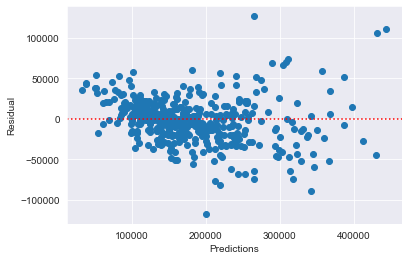

In [110]:
# calculate the residual and plot the results
res = y_test_res
plt.scatter( y_test_pred , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

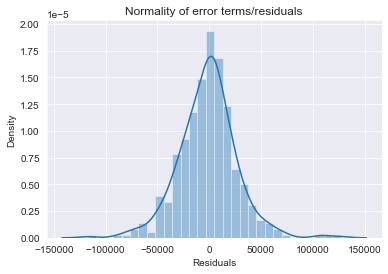

In [111]:
# Distribution of errors
p = sns.distplot(y_test_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

<h2> Ridge Regression </h2>

In [112]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 3.5,
 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 15, 20, 25, 50, 100, 500, 1000 ]}

In [113]:
ridge = Ridge()

# cross validation
folds = 5
#
ridge_cv = GridSearchCV(estimator = ridge, 
                        scoring= 'neg_mean_absolute_error',  
                        param_grid = params, 
                        return_train_score=True,
                        cv = folds, 
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10,
                                   15, 20, 25, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
# fetch the results of our gridsearch
ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.020767  3.414163e-03         0.009795    1.073472e-03      0.0001   
1        0.016849  2.864386e-03         0.009992    2.431711e-03       0.001   
2        0.013457  2.259519e-03         0.006071    7.240233e-04        0.01   
3        0.010972  1.997977e-03         0.005880    6.195552e-04        0.05   
4        0.014499  3.185600e-03         0.007053    1.439570e-03         0.1   
5        0.014301  2.017396e-03         0.008033    1.142154e-03         0.2   
6        0.010856  1.011241e-03         0.006464    1.174969e-03         0.3   
7        0.011556  1.562277e-03         0.007054    1.439252e-03         0.4   
8        0.011560  2.181610e-03         0.005681    3.916057e-04         0.5   
9        0.010972  7.328194e-04         0.005679    1.142669e-03         0.6   
10       0.006466  1.175683e-03         0.003722    1.899365e-03         0.7   
11       0.005094  3.906505e-04         0.002743    7.326039e-04         0.8   
12       0.007836  1.638719e-03         0.007445    7.134205e-03         0.9   
13       0.006465  7.837776e-04         0.003918    1.240203e-03         1.0   
14       0.005289  4.804990e-04         0.002350    4.799734e-04         2.0   
15       0.005329  4.534861e-04         0.002664    3.839123e-04         3.0   
16       0.004702  7.332661e-04         0.002742    7.331506e-04         3.5   
17       0.005392  4.378543e-04         0.002546    4.808734e-04         4.0   
18       0.005094  3.917731e-04         0.002938    9.344062e-07         4.5   
19       0.005486  4.808510e-04         0.002350    4.796813e-04         5.0   
20       0.005813  2.098846e-04         0.003136    3.914377e-04         6.0   
21       0.006466  7.841842e-04         0.003135    3.901962e-04         7.0   
22       0.005196  3.926579e-04         0.002742    3.912463e-04         8.0   
23       0.005681  7.335330e-04         0.003134    3.913170e-04         9.0   
24       0.005094  3.930569e-04         0.003134    3.929395e-04          10   
25       0.004507  4.801100e-04         0.002154    3.921988e-04          15   
26       0.004898  7.478899e-07         0.002742    3.920577e-04          20   
27       0.005095  3.906524e-04         0.002958    4.230935e-05          25   
28       0.004703  3.920573e-04         0.002350    4.797789e-04          50   
29       0.005483  4.835376e-04         0.002619    5.541764e-04         100   
30       0.005485  1.175190e-03         0.002739    7.320150e-04         500   
31       0.005492  4.782923e-04         0.002744    4.020303e-04        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -23372.069939      -18773.444813   
1    {'alpha': 0.001}      -23390.383177      -18759.068326   
2     {'alpha': 0.01}      -23459.070164      -18712.415794   
3     {'alpha': 0.05}      -23483.658290      -18688.088870   
4      {'alpha': 0.1}      -23473.181181      -18683.561979   
5      {'alpha': 0.2}      -23442.419821      -18684.184936   
6      {'alpha': 0.3}      -23410.044319      -18688.589547   
7      {'alpha': 0.4}      -23377.968809      -18694.170513   
8      {'alpha': 0.5}      -23348.521763      -18703.991543   
9      {'alpha': 0.6}      -23322.214664      -18713.084171   
10     {'alpha': 0.7}      -23298.681502      -18721.500959   
11     {'alpha': 0.8}      -23275.901040      -18729.534826   
12     {'alpha': 0.9}      -23253.651081      -18740.129985   
13     {'alpha': 1.0}      -23231.934512      -18749.950631   
14     {'alpha': 2.0}      -23052.471685      -18828.750829   
15     {'alpha': 3.0}      -22919.423628      -18893.461278   
16     {'alpha': 3.5}      -22864.348716      -18919.823521   
17     {'alpha': 4.0}      -22814.859281      -18952.234389   
18     {'alpha': 4.5}      -22774.354129      -18986.335892   
19     {'alpha': 5.0}      -22739.552232      -19016.735005   
20     {'alpha': 6.0}      -22683.650448

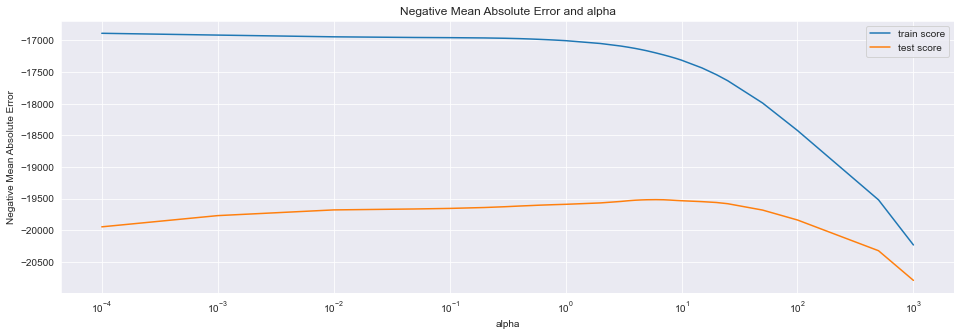

In [115]:
# plot a graph for comparing the test and train performance on different alpha params
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

# plot train result
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])

# plot test results
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])

# set labels and title 
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")

# plot legend
plt.legend(['train score', 'test score'], loc='upper right')

# show graph
plt.show()

In [116]:
print(ridge_cv.best_params_)

{'alpha': 6.0}


In [117]:
#Fitting Ridge model for alpha = 15
alpha = ridge_cv.best_params_['alpha']

# initialise Ridge Model
ridge = Ridge(alpha=alpha)

# Fit the data
ridge.fit(X_train, y_train)

# printing coefficients which have been penalised
print(ridge.coef_)

[ 12127.13963689  52569.79357711 -19937.72632539   4916.60708689
   3122.00368111   5354.1604173    8197.81485277    226.89024352
  -1364.04891263   -416.70565603   3934.02699168  31299.18144961
   1666.8105795    4789.23235199    276.21879616  -3370.61289962
   6335.17031374   3196.70137152  -3699.52637689   -237.80245462
   -169.89112951   3535.65886418   1970.7622133    8272.99367584
  22415.79846681   -900.78721907   6498.66216974   3090.29900814
  -4165.14167033   3308.15962842   3381.86473457  -5235.82014418
  -1965.16308778  -2070.61849094  -3773.42005862  -2619.02238627
  -1199.62641939  -2476.41582732   9832.60198773   9832.60198772
  -5514.02326872   8973.8730418   -7256.09205391  -1284.60191732
  -3878.6642498   15952.15378035    791.25857222  -5518.68693121
   5035.02136096   6767.9327182    4062.71189887   5206.92636771
    346.42770661   4611.4894279    1188.06520014  -2785.47718013
    226.35107267   -308.95233146   2313.73309157   2387.84432439
   1514.92959345  -1427.2

In [118]:
# Lets calculate some metric21s such as R2 score, RSS and RMSE

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# initialize a list
metric2 = []

# calcuate R2 Score for Training data
metric2.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric2.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric2.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric2.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric2.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric2.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric2.append(len(X_train.columns))

# add the alpha value if present
metric2.append(ridge_cv.best_params_['alpha'])

Observation:
    
    Ridge has done a good coefficient balance with 15 as alpha value for regularizing. But since the number of features is 81 it will make the mode complex and overfit so let try building Ridge model with the RFE train data

lets take train data from RFE and Perform Ridge Regression for as a less complex model

In [119]:
# fit the RFE data to gridcv for ridge
ridge_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10,
                                   15, 20, 25, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
print(ridge_cv.best_params_)

{'alpha': 4.0}


In [121]:
#Fitting Ridge model for alpha = 5
alpha = ridge_cv.best_params_['alpha']

# Initialze Ridhe Model
ridge_rfe = Ridge(alpha=alpha)

# fit rfe data to RIdge model
ridge_rfe.fit(X_train_rfe, y_train)

# printing coefficients which have been penalised
print(ridge_rfe.coef_)

[  6800.26928773  10260.0899672    4062.14513906   4472.98608656
   3277.14061542   6954.20145459  22000.40794822  -5138.91577591
   8834.20430394 -10710.88523741   4746.36401662  34085.03319455
  -7044.05875598  13826.96266016   3846.70391431   5741.99694131]


In [122]:
# Lets calculate some metric31s such as R2 score, RSS and RMSE

y_train_pred = ridge_rfe.predict(X_train_rfe)
y_test_pred = ridge_rfe.predict(X_test_rfe)

# initialize a list
metric3 = []

# calcuate R2 Score for Training data
metric3.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric3.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric3.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric3.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric3.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric3.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
metric3.append(len(X_train_rfe.columns))

# add the alpha value if present
metric3.append(ridge_cv.best_params_['alpha'])

In [123]:
metric3

[0.855642856459905,
 0.8576850285410673,
 981457499631.5507,
 342025933557.4595,
 31004.367636957708,
 27944.25033604435,
 16,
 4.0]

<h2>Lasso Regression</h2>

In [124]:
# create lasso regression instance
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50, 75, 100, 200, 250, 300, 500, 1000 ]}


# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        return_train_score=True,
                        cv = folds, 
                        param_grid = params, 
                        verbose = 1,
                        scoring= 'neg_mean_absolute_error')            

# fit the train and test data
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   75, 100, 200, 250, 300, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
# featch Lasso results
lasso_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.352216      0.024948         0.009173        0.001911      0.0001   
1        0.288834      0.072764         0.007363        0.001765       0.001   
2        0.302832      0.020167         0.007828        0.002622        0.01   
3        0.302632      0.030284         0.007745        0.002904        0.05   
4        0.237929      0.058578         0.008295        0.002240         0.1   
5        0.255047      0.016929         0.006471        0.001332        10.0   
6        0.255887      0.038966         0.007641        0.001693          20   
7        0.247972      0.023473         0.008439        0.001442          50   
8        0.251189      0.054730         0.008034        0.001438          75   
9        0.230815      0.074441         0.008229        0.001457         100   
10       0.056625      0.012563         0.008814        0.001393         200   
11       0.045877      0.009569         0.008828        0.001510         250   
12       0.042966      0.011144         0.007441        0.001702         300   
13       0.032574      0.003187         0.008419        0.001327         500   
14       0.020381      0.008007         0.006874        0.001736        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -23319.509149      -18663.863231   
1    {'alpha': 0.001}      -23319.519631      -18663.847076   
2     {'alpha': 0.01}      -23319.624448      -18663.685522   
3     {'alpha': 0.05}      -23320.091343      -18662.967507   
4      {'alpha': 0.1}      -23320.674681      -18662.069990   
5     {'alpha': 10.0}      -23293.344196      -18549.744727   
6       {'alpha': 20}      -23146.930969      -18517.081821   
7       {'alpha': 50}      -22846.818216      -18577.457215   
8       {'alpha': 75}      -22792.546704      -18639.029065   
9      {'alpha': 100}      -22685.347415      -18692.158570   
10     {'alpha': 200}      -22361.791875      -19027.791152   
11     {'alpha': 250}      -22256.433831      -19205.136906   
12     {'alpha': 300}      -22174.052754      -19332.118260   
13     {'alpha': 500}      -22137.997751      -19631.026393   
14    {'alpha': 1000}      -22863.331548      -19979.623166   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0       -20859.561528      -19460.105035  ...    -19694.100356   
1       -20860.254814      -19459.955567  ...    -19694.206964   
2       -20867.187675      -19458.460882  ...    -19695.273037   
3       -20898.000390      -19451.817866  ...    -19700.011355   
4       -20901.197730      -19443.514154  ...    -19698.870497   
5       -20727.792720      -19044.397731  ...    -19544.816772   
6       -20584.882102      -19024.504435  ...    -19464.613565   
7       -20176.539273      -19004.215528  ...    -19301.154773   
8       -20070.983479      -19020.716131  ...    -19267.394583   
9       -20030.697392      -19037.892401  ...    -19227.852384   
10      -20117.261890      -19073.840943  ...    -19200.568415   
11      -20060.526538      -19055.612528  ...    -19193.277468   
12      -20029.172410      -19097.315500  ...    -19206.940014   
13      -19962.011653      -19196.935712  ...    -19331.941392   
14      -20424.441594      -19506.562645  ...    -19852.294186   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0      2368.763525               10       -15831.180702       -17301.114376   
1      2368.840851               11       -15831.182807       -17301.118272   
2      2369.616047               12       -15831.203851       -17301.157230   
3      2373.104150               14       -15831.297630       -17301.330373   
4      2373.944516               13       -15831.414786       -17301.546802   
5      2387.369178                9       -15835.095779       -17340.141181   
6      2348.098180                8       -15806.570004       -17338.601344   
7      2258.881771       

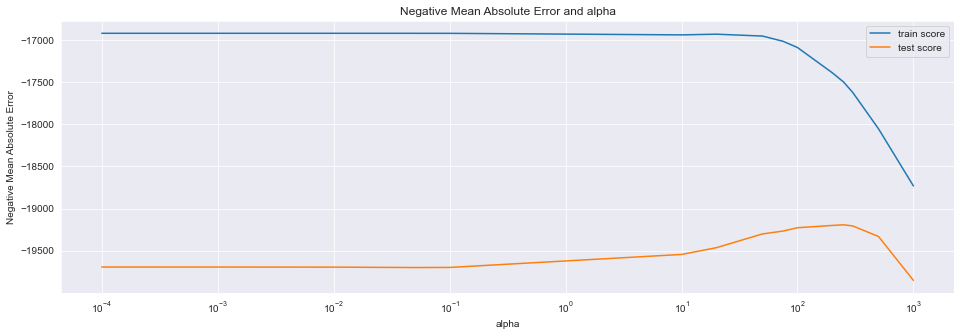

In [126]:
# plot a graph for comparing the test and train performance on different alpha params
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

# plot train result
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])

# plot test results
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

# set labels and title 
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")

# plot legend
plt.legend(['train score', 'test score'], loc='upper right')

# show graph
plt.show()

In [127]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 250}


In [128]:
#Fitting Ridge model for alpha = 200
alpha = lasso_cv.best_params_['alpha']

# build Lasso model
lasso = Lasso(alpha=alpha)
        
# fit Train and test data
lasso.fit(X_train, y_train)

Lasso(alpha=250)

In [129]:
# Lets calculate some metric41s such as R2 score, RSS and RMSE

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# initialize a list
metric4 = []

# calcuate R2 Score for Training data
metric4.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric4.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric4.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric4.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric4.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric4.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
feature_cnt = len(lasso.coef_)-pd.Series(lasso.coef_).apply(lambda x: x == 0).sum()
metric4.append(feature_cnt)

# add the alpha value if present
metric4.append(lasso_cv.best_params_['alpha'])

**Observation:**
    
    Lasso did a great analysis with the advantage oof feature selection which took 53 features outof 81 almost 30 features got to zero coefficient.

Lets build lasso with our rfe data

In [130]:
# fit the Training data from RFE selection
lasso_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   75, 100, 200, 250, 300, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 250}


In [134]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
alpha = lasso_cv.best_params_['alpha']

# build lasso for 200 alpha
lasso_rfe = Lasso(alpha=alpha)

# fit the rfe train data and
lasso_rfe.fit(X_train_rfe,y_train)

Lasso(alpha=250)

In [135]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred = lasso_rfe.predict(X_train_rfe)
y_test_pred = lasso_rfe.predict(X_test_rfe)

# initialize a list
metric5 = []

# calcuate R2 Score for Training data
metric5.append(r2_score(y_train, y_train_pred))

# calculate R2 Score for Test data
metric5.append(r2_score(y_test, y_test_pred))

# calcuate RSS for Train Data
metric5.append(np.sum(np.square(y_train - y_train_pred)))

# calcuate RSS for Test Data
metric5.append(np.sum(np.square(y_test - y_test_pred)))

# calcuate MSE for Train Data
metric5.append(mean_squared_error(y_train, y_train_pred)**0.5)

# calcuate MSE for Test Data
metric5.append(mean_squared_error(y_test, y_test_pred)**0.5)

# add number of features for the model
feature_cnt = len(lasso_rfe.coef_)-pd.Series(lasso_rfe.coef_).apply(lambda x: x == 0).sum()
metric5.append(feature_cnt)

# add the alpha value if present
metric5.append(lasso_cv.best_params_['alpha'])

<h2> Model Summary </h2><br>

Top Five features on overall coeff score based on the six models are :
<b>
<ul>
<ol>TotalFlrSFAbvGrd</ol>
<ol>Neighborhood_NridgHt</ol>
<ol>Neighborhood_Sawyer</ol>
<ol>GrLivArea</ol>
<ol>BldgType_Twnhs</ol>
</ul>
</b>

To do:
    
    We can see that the least used features where the **Exterior2nd** column which doesn't impact SalePrice much.. we can try rebuilding the model by removing it

In [136]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No of Features','Alpha'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

lr_metric_rfe = pd.Series(metric1, name = 'Linear Regression RFE')

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_rfe_metric = pd.Series(metric3, name = 'Ridge Regression RFE')
ls_metric = pd.Series(metric4, name = 'Lasso Regression')
ls_rfe_metric = pd.Series(metric5, name = 'Lasso Regression RFE')

final_metric = pd.concat([lr_metric,lr_metric_rfe, rg_metric,rg_rfe_metric, ls_metric,ls_rfe_metric], axis = 1)

print("\n\n  \t\t\t\t  ============= Overall view of the models ================")

round(final_metric,4).astype(str)



  				  ============= Overall view of the models ================


Metric  Linear Regression Linear Regression RFE  \
0  R2 Score (Train)             0.9308                0.8557   
1   R2 Score (Test)             0.8273                 0.857   
2       RSS (Train)  470740290833.7209     981137820890.5364   
3        RSS (Test)  415134549806.8964     343754235010.7016   
4       MSE (Train)         21472.2628            30999.3179   
5        MSE (Test)          30786.292            28014.7643   
6    No of Features              137.0                  16.0   
7             Alpha                0.0                   0.0   

    Ridge Regression Ridge Regression RFE   Lasso Regression  \
0             0.9057               0.8556             0.8998   
1             0.8883               0.8577             0.8877   
2  640991872662.2161    981457499631.5507  681040798344.5085   
3  268520134699.8473    342025933557.4594   269798328048.096   
4         25056.0952           31004.3676          25826.984   
5         24760.0418           27944.2503         24818.9024   
6               81.0                 16.0               41.0   
7                6.0                  4.0              250.0   

  Lasso Regression RFE  
0               0.8554  
1                0.859  
2     982916187275.481  
3    338951328927.9122  
4           31027.3991  
5           27818.3659  
6                 16.0  
7                250.0

<h1> Conclusion </h1>

In [137]:
print("\n\n \t   =============== Final models ================")

round(final_metric[['Metric','Linear Regression RFE','Ridge Regression RFE','Lasso Regression RFE']],4).astype(str)



 	   =============== Final models ================


Metric Linear Regression RFE Ridge Regression RFE  \
0  R2 Score (Train)                0.8557               0.8556   
1   R2 Score (Test)                 0.857               0.8577   
2       RSS (Train)     981137820890.5364    981457499631.5507   
3        RSS (Test)     343754235010.7016    342025933557.4594   
4       MSE (Train)            30999.3179           31004.3676   
5        MSE (Test)            28014.7643           27944.2503   
6    No of Features                  16.0                 16.0   
7             Alpha                   0.0                  4.0   

  Lasso Regression RFE  
0               0.8554  
1                0.859  
2     982916187275.481  
3    338951328927.9122  
4           31027.3991  
5           27818.3659  
6                 16.0  
7                250.0

**The final models have the train and test R2 Score with a very minimal difference of 0.001 R2 score between the models for train data and 0.002 incease in R2 score for successive models**

Lasso looks better than the other models, So we can conclude that Lasso performs well in these regressions

In [138]:
X_train["SalePrice"] = y_train
model = smf.ols(
    formula = "SalePrice ~ TotalFlrSFAbvGrd + Neighborhood_NridgHt + Neighborhood_Sawyer + GrLivArea + BldgType_Twnhs",
    data = X_train
)

model_final = model.fit()

In [139]:
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     500.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.65e-271
Time:                        19:36:59   Log-Likelihood:                -12361.
No. Observations:                1021   AIC:                         2.473e+04
Df Residuals:                    1015   BIC:                         2.476e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.793e+05 

In [140]:
y_pred = model_final.predict(X_test)

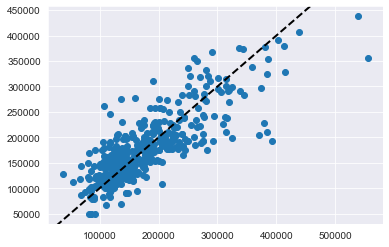

In [141]:
plt.scatter(y_test, y_pred)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False)

In [170]:
#result and GUI design
import tkinter as tk
from tkinter import ttk

def find_saleprice():
    TotalFlrSFAbvGrd = text_1.get("1.0","end")
    GrLivArea = text_2.get("1.0","end")
    
    TotalFlrSFAbvGrd = TotalFlrSFAbvGrd.strip()
    GrLivArea = GrLivArea.strip()
    
    TotalFlrSFAbvGrd = float(TotalFlrSFAbvGrd) * 35.59
    GrLivArea = float(GrLivArea) * 35.59
    
    if comboExample_1.get() == '是':
        if comboExample.get() == 'StoneBr和NoRidge社區':
            price = round(TotalFlrSFAbvGrd*1.017e+5 + GrLivArea*(-5.237e+4) + 9.12e+4 - 4.682e+4) 
            result = f'預測的房價為 {price} 元'
            result_label.configure(text=result)
        elif comboExample.get() == "Sawyer社區":
            price = round(TotalFlrSFAbvGrd*1.017e+5 + GrLivArea*(-5.237e+4) - 9422.9454 - 4.682e+4)
            result = f'預測的房價為 {price} 元'
            result_label.configure(text=result)
        else:
            price = round(TotalFlrSFAbvGrd*1.017e+5 + GrLivArea*(-5.237e+4) - 4.682e+4)
            result = f'預測的房價為 {price} 元'
            result_label.configure(text=result)
    else:
        if comboExample.get() == 'StoneBr和NoRidge社區':
            price = round(TotalFlrSFAbvGrd*1.017e+5 + GrLivArea*(-5.237e+4) + 9.12e+4)
            result = f'預測的房價為 {price} 元'
            result_label.configure(text=result)
        elif comboExample.get() == "Sawyer社區":
            price = round(TotalFlrSFAbvGrd*1.017e+5 + GrLivArea*(-5.237e+4) - 9422.9454) 
            result = f'預測的房價為 {price} 元'
            result_label.configure(text=result)
        else:
            price = round(TotalFlrSFAbvGrd*1.017e+5 + GrLivArea*(-5.237e+4))
            result = f'預測的房價為 {price} 元'
            result_label.configure(text=result)



    
fare = tk.Tk()
fare.title('房價預測系統')
fare.geometry('600x400')
label_1 = tk.Label(fare, text = '一樓加二樓總坪數：', font = ('Arial', 12) )
label_1.grid(row = 0, column = 0, padx = 10, pady = 15, sticky='w')
text_1 = tk.Text(fare, width = 10, height = 1)
text_1.grid(row = 0, column = 1, padx = 20, sticky='w')

label_2 = tk.Label(fare, text = '地面上空間總坪數：', font = ('Arial', 12) )
label_2.grid(row = 1, column = 0, padx = 10, pady = 15, sticky='w')
text_2 = tk.Text(fare, width = 10, height = 1)
text_2.grid(row = 1, column = 1, padx = 20, sticky='w')

label_3 = tk.Label(fare, text = '所在社區為：', font = ('Arial', 12) )
label_3.grid(row = 2, column = 0, padx = 10, pady = 15, sticky='w')
comboExample = ttk.Combobox(fare, 
                            values=[
                                    "StoneBr和NoRidge社區", 
                                    "Sawyer社區",
                                    "其他"
                                     ])
comboExample.grid(row = 2, column = 1, padx = 10, pady = 15, sticky='w')

label_4 = tk.Label(fare, text = '是否是Towmhouse：', font = ('Arial', 12) )
label_4.grid(row = 3, column = 0, padx = 10, pady = 15, sticky='w')
comboExample_1 = ttk.Combobox(fare, 
                            values=[
                                    "是", 
                                    "否"
                                    ])
comboExample_1.grid(row = 3, column = 1, padx = 10, pady = 15, sticky='w')


button = tk.Button(fare, text = 'Check the price', font = ('Arial', 12), width = 59, height = 2, command = find_saleprice)
button.grid(row = 4, column = 0, columnspan = 4, padx = 10, sticky='w')

result_label = tk.Label(fare, font = ('Arial', 12), justify = "left")
result_label.grid(row = 5, column = 0, columnspan = 4, padx = 25, sticky = 'w')

    
fare.mainloop()